# ⚫ **Needed Libaries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
colors=['#183a5a'	,'#efb758'	,'#c34129'	,'#e76666'	,'#f0d582','#e5a478','#616265','#5e4e4e']
sns.set_style("ticks")

# ⚫ **Uploading Data**

In [ ]:
# https://docs.google.com/spreadsheets/d/1E69G9WSlqSfNEGpC9e1torOYSVPghvEbDRzajH0r89k/edit#gid=374609669
!gdown --id 1k313G6CQr7XF6ha9BH_AUUBiNzkxm_qX

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1k313G6CQr7XF6ha9BH_AUUBiNzkxm_qX
To: /content/Egypt_Food_Prices.csv
100% 149k/149k [00:00<00:00, 57.8MB/s]


In [ ]:
df=pd.read_csv('Egypt_Food_Prices.csv')

In [ ]:
df.head(20)

,date,category,commodity,unit,price,usdprice
0,8/15/2010,cereals and tubers,Pasta,KG,4.70,0.2031
1,8/15/2010,cereals and tubers,Potatoes,KG,1.81,0.0782
2,8/15/2010,cereals and tubers,Rice,KG,3.98,0.1721
3,8/15/2010,cereals and tubers,Wheat flour,KG,3.44,0.1487
4,8/15/2010,"meat, fish and eggs",Meat (beef),KG,50.22,2.1717
5,8/15/2010,"meat, fish and eggs","Meat (chicken, frozen)",KG,17.00,0.7351
6,8/15/2010,miscellaneous food,Sugar,KG,4.28,0.1852
7,8/15/2010,oil and fats,Ghee (artificial),KG,9.82,0.4249
8,8/15/2010,oil and fats,Ghee (natural),KG,33.42,1.4453
9,8/15/2010,oil and fats,Oil (maize),800 G,8.76,0.3787


In [ ]:
df.tail(20)

,date,category,commodity,unit,price,usdprice
2588,8/15/2022,vegetables and fruits,Tomatoes,KG,6.35,0.2746
2589,9/15/2022,cereals and tubers,Pasta,KG,13.93,0.6024
2590,9/15/2022,cereals and tubers,Potatoes,KG,8.00,0.3459
2591,9/15/2022,cereals and tubers,Rice,KG,15.67,0.6776
2592,9/15/2022,cereals and tubers,Wheat flour,KG,12.49,0.5401
2593,9/15/2022,"meat, fish and eggs",Eggs,Unit,2.43,0.1051
2594,9/15/2022,"meat, fish and eggs","Meat (beef, without bones)",KG,171.65,7.4227
2595,9/15/2022,"meat, fish and eggs","Meat (chicken, frozen)",KG,36.74,1.5888
2596,9/15/2022,milk and dairy,Cheese,KG,37.03,1.6013
2597,9/15/2022,milk and dairy,Cheese (picon),8 pcs,19.42,0.8398


In [ ]:
df.columns

Index(['date', 'category', 'commodity', 'unit', 'price', 'usdprice'], dtype='object')

In [ ]:
df.rename(columns={'commodity':'food_name', 'category':'food_category'}, inplace=True)
df.columns

Index(['date', 'food_category', 'food_name', 'unit', 'price', 'usdprice'], dtype='object')

In [ ]:
df.dtypes

date              object
food_category     object
food_name         object
unit              object
price            float64
usdprice         float64
dtype: object

In [ ]:
print(df['food_category'].value_counts())
print(df['food_name'].value_counts())

cereals and tubers       579
oil and fats             518
vegetables and fruits    496
meat, fish and eggs      409
pulses and nuts          290
milk and dairy           171
miscellaneous food       145
Name: food_category, dtype: int64
Pasta                         145
Ghee (natural)                145
Tomatoes                      145
Potatoes                      145
Lentils                       145
Beans (fava, dry)             145
Garlic                        145
Meat (chicken, frozen)        145
Wheat flour                   145
Sugar                         145
Rice                          144
Oil (maize)                   142
Onions (red)                  142
Eggs                          116
Oil (sunflower)                87
Meat (beef, without bones)     84
Cheese (picon)                 84
Cheese                         84
Oil (mixed)                    84
Onions (white)                 64
Meat (beef)                    61
Ghee (artificial)              60
Fish (tilapia) 

# ⚫ **Preface**

**Food Prices Analysis is one of the most important Factors affecting the country's economy and growth and it's also a daily requirement for all consumers of the Egyptian market. With average Egyptian retail prices, we address the prices of vegetables and fruits, poultry prices of all types, municipal red meat prices, and frozen or imported meat prices, including all groceries products at today's price from 2010 to 2022 to Focus on How the prices is changing everyday and anlalyze each product price evolution every month**

**↪The data set includes information about:**

**From 15/l8/2010 Up To 15/9/2022**
- prices for cereals and tubers(Pasta,Potatoes,Rice,Wheat flour).
- prices for meat, fish and eggs.
- prices for miscellaneous food like Sugar
- prices for oil and fats(Ghee artificial and Ghee natural,Wheat flour)
- prices for pulses and nuts Like Beans(fava, dry),Lentils
- prices for Vegtables and Fruits Like Garlic, Onions (red and white), Tomatoes

**So, in this Exploratory Data Analysis section the data will be analyzed by summarizing its main Points With Extracting Important Insights , using statistical graphics and other data visualization methods. As such the reader will be familiar with what the data can tell.**

In [ ]:
food_names=["Pasta","Ghee (natural)","Tomatoes","Potatoes","Lentils","Beans (fava, dry)","Garlic","Meat (chicken, frozen)","Wheat flour"
,"Sugar","Rice","Oil (maize)","Onions (red)","Eggs","Oil (sunflower)","Meat (beef, without bones)","Cheese (picon)","Cheese",
"Oil (mixed)","Onions (white)","Meat (beef)","Ghee (artificial)","Fish (tilapia)","Milk"]

**Add New Column Year**

In [ ]:
df["date"] = pd.to_datetime(df["date"])

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year

**DataFrame For food Categories Price During Months Of Years from 2020-2022**

In [ ]:
new_df= df.groupby(['date', 'food_category']).sum()
new_df = new_df.reset_index()
new_df["date"] = pd.to_datetime(new_df["date"])
new_df['year'] = pd.DatetimeIndex(new_df['date']).year
new_df.head(20)

,date,food_category,index,price,usdprice,year
0,2010-08-15,cereals and tubers,6,13.93,0.6021,2010
1,2010-08-15,"meat, fish and eggs",9,67.22,2.9068,2010
2,2010-08-15,miscellaneous food,6,4.28,0.1852,2010
3,2010-08-15,oil and fats,24,52.00,2.2489,2010
4,2010-08-15,pulses and nuts,21,14.65,0.6336,2010
5,2010-08-15,vegetables and fruits,54,17.02,0.7360,2010
6,2010-09-15,cereals and tubers,70,15.03,0.6493,2010
7,2010-09-15,"meat, fish and eggs",41,70.09,3.0307,2010
8,2010-09-15,miscellaneous food,22,4.38,0.1892,2010
9,2010-09-15,oil and fats,72,52.77,2.2822,2010


In [ ]:
new_df.tail(30)

,date,food_category,price,usdprice,year
924,2022-05-15,pulses and nuts,48.92,2.1154,2022
925,2022-05-15,vegetables and fruits,41.97,1.8149,2022
926,2022-06-15,cereals and tubers,45.62,1.9727,2022
927,2022-06-15,"meat, fish and eggs",211.08,9.1277,2022
928,2022-06-15,milk and dairy,51.23,2.2154,2022
929,2022-06-15,miscellaneous food,13.77,0.5955,2022
930,2022-06-15,oil and fats,220.72,9.5446,2022
931,2022-06-15,pulses and nuts,49.49,2.1401,2022
932,2022-06-15,vegetables and fruits,32.27,1.3955,2022
933,2022-07-15,cereals and tubers,47.10,2.0367,2022


**DataFrame For food Categories Price During Years from 2020-2022**
With:

*   Max price during 12 Months
*   Min price during 12 Months
*   Average price during 12 Months



In [ ]:
df_years = new_df.groupby(['year', 'food_category']).agg({'price': ['mean', 'min', 'max']})
df_years.columns = ['price_mean', 'price_min', 'price_max']
df_years = df_years.reset_index()
df_years.head(20)

,year,food_category,price_mean,price_min,price_max
0,2010,cereals and tubers,14.650000,13.93,15.03
1,2010,"meat, fish and eggs",69.566000,67.22,71.52
2,2010,miscellaneous food,4.860000,4.28,6.19
3,2010,oil and fats,53.510000,52.00,55.09
4,2010,pulses and nuts,15.500000,14.65,16.37
5,2010,vegetables and fruits,20.678000,17.02,24.71
6,2011,cereals and tubers,15.575833,13.80,17.80
7,2011,"meat, fish and eggs",69.180833,66.33,73.90
8,2011,miscellaneous food,5.591667,4.98,6.30
9,2011,oil and fats,60.569167,53.40,65.60


In [ ]:
df_years.head(30)

,year,food_category,price_mean,price_min,price_max
0,2010,cereals and tubers,14.650000,13.93,15.03
1,2010,"meat, fish and eggs",69.566000,67.22,71.52
2,2010,miscellaneous food,4.860000,4.28,6.19
3,2010,oil and fats,53.510000,52.00,55.09
4,2010,pulses and nuts,15.500000,14.65,16.37
5,2010,vegetables and fruits,20.678000,17.02,24.71
6,2011,cereals and tubers,15.575833,13.80,17.80
7,2011,"meat, fish and eggs",69.180833,66.33,73.90
8,2011,miscellaneous food,5.591667,4.98,6.30
9,2011,oil and fats,60.569167,53.40,65.60


In [ ]:
df=df.reset_index()
df.head(20)

,index,date,food_category,food_name,unit,price,usdprice,year
0,0,2010-08-15,cereals and tubers,Pasta,KG,4.70,0.2031,2010
1,1,2010-08-15,cereals and tubers,Potatoes,KG,1.81,0.0782,2010
2,2,2010-08-15,cereals and tubers,Rice,KG,3.98,0.1721,2010
3,3,2010-08-15,cereals and tubers,Wheat flour,KG,3.44,0.1487,2010
4,4,2010-08-15,"meat, fish and eggs",Meat (beef),KG,50.22,2.1717,2010
5,5,2010-08-15,"meat, fish and eggs","Meat (chicken, frozen)",KG,17.00,0.7351,2010
6,6,2010-08-15,miscellaneous food,Sugar,KG,4.28,0.1852,2010
7,7,2010-08-15,oil and fats,Ghee (artificial),KG,9.82,0.4249,2010
8,8,2010-08-15,oil and fats,Ghee (natural),KG,33.42,1.4453,2010
9,9,2010-08-15,oil and fats,Oil (maize),800 G,8.76,0.3787,2010


# 🍚 **Cereals and Tubers**

In [ ]:
df[df['food_category']=='cereals and tubers']['food_name'].value_counts()

Pasta          145
Potatoes       145
Wheat flour    145
Rice           144
Name: food_name, dtype: int64

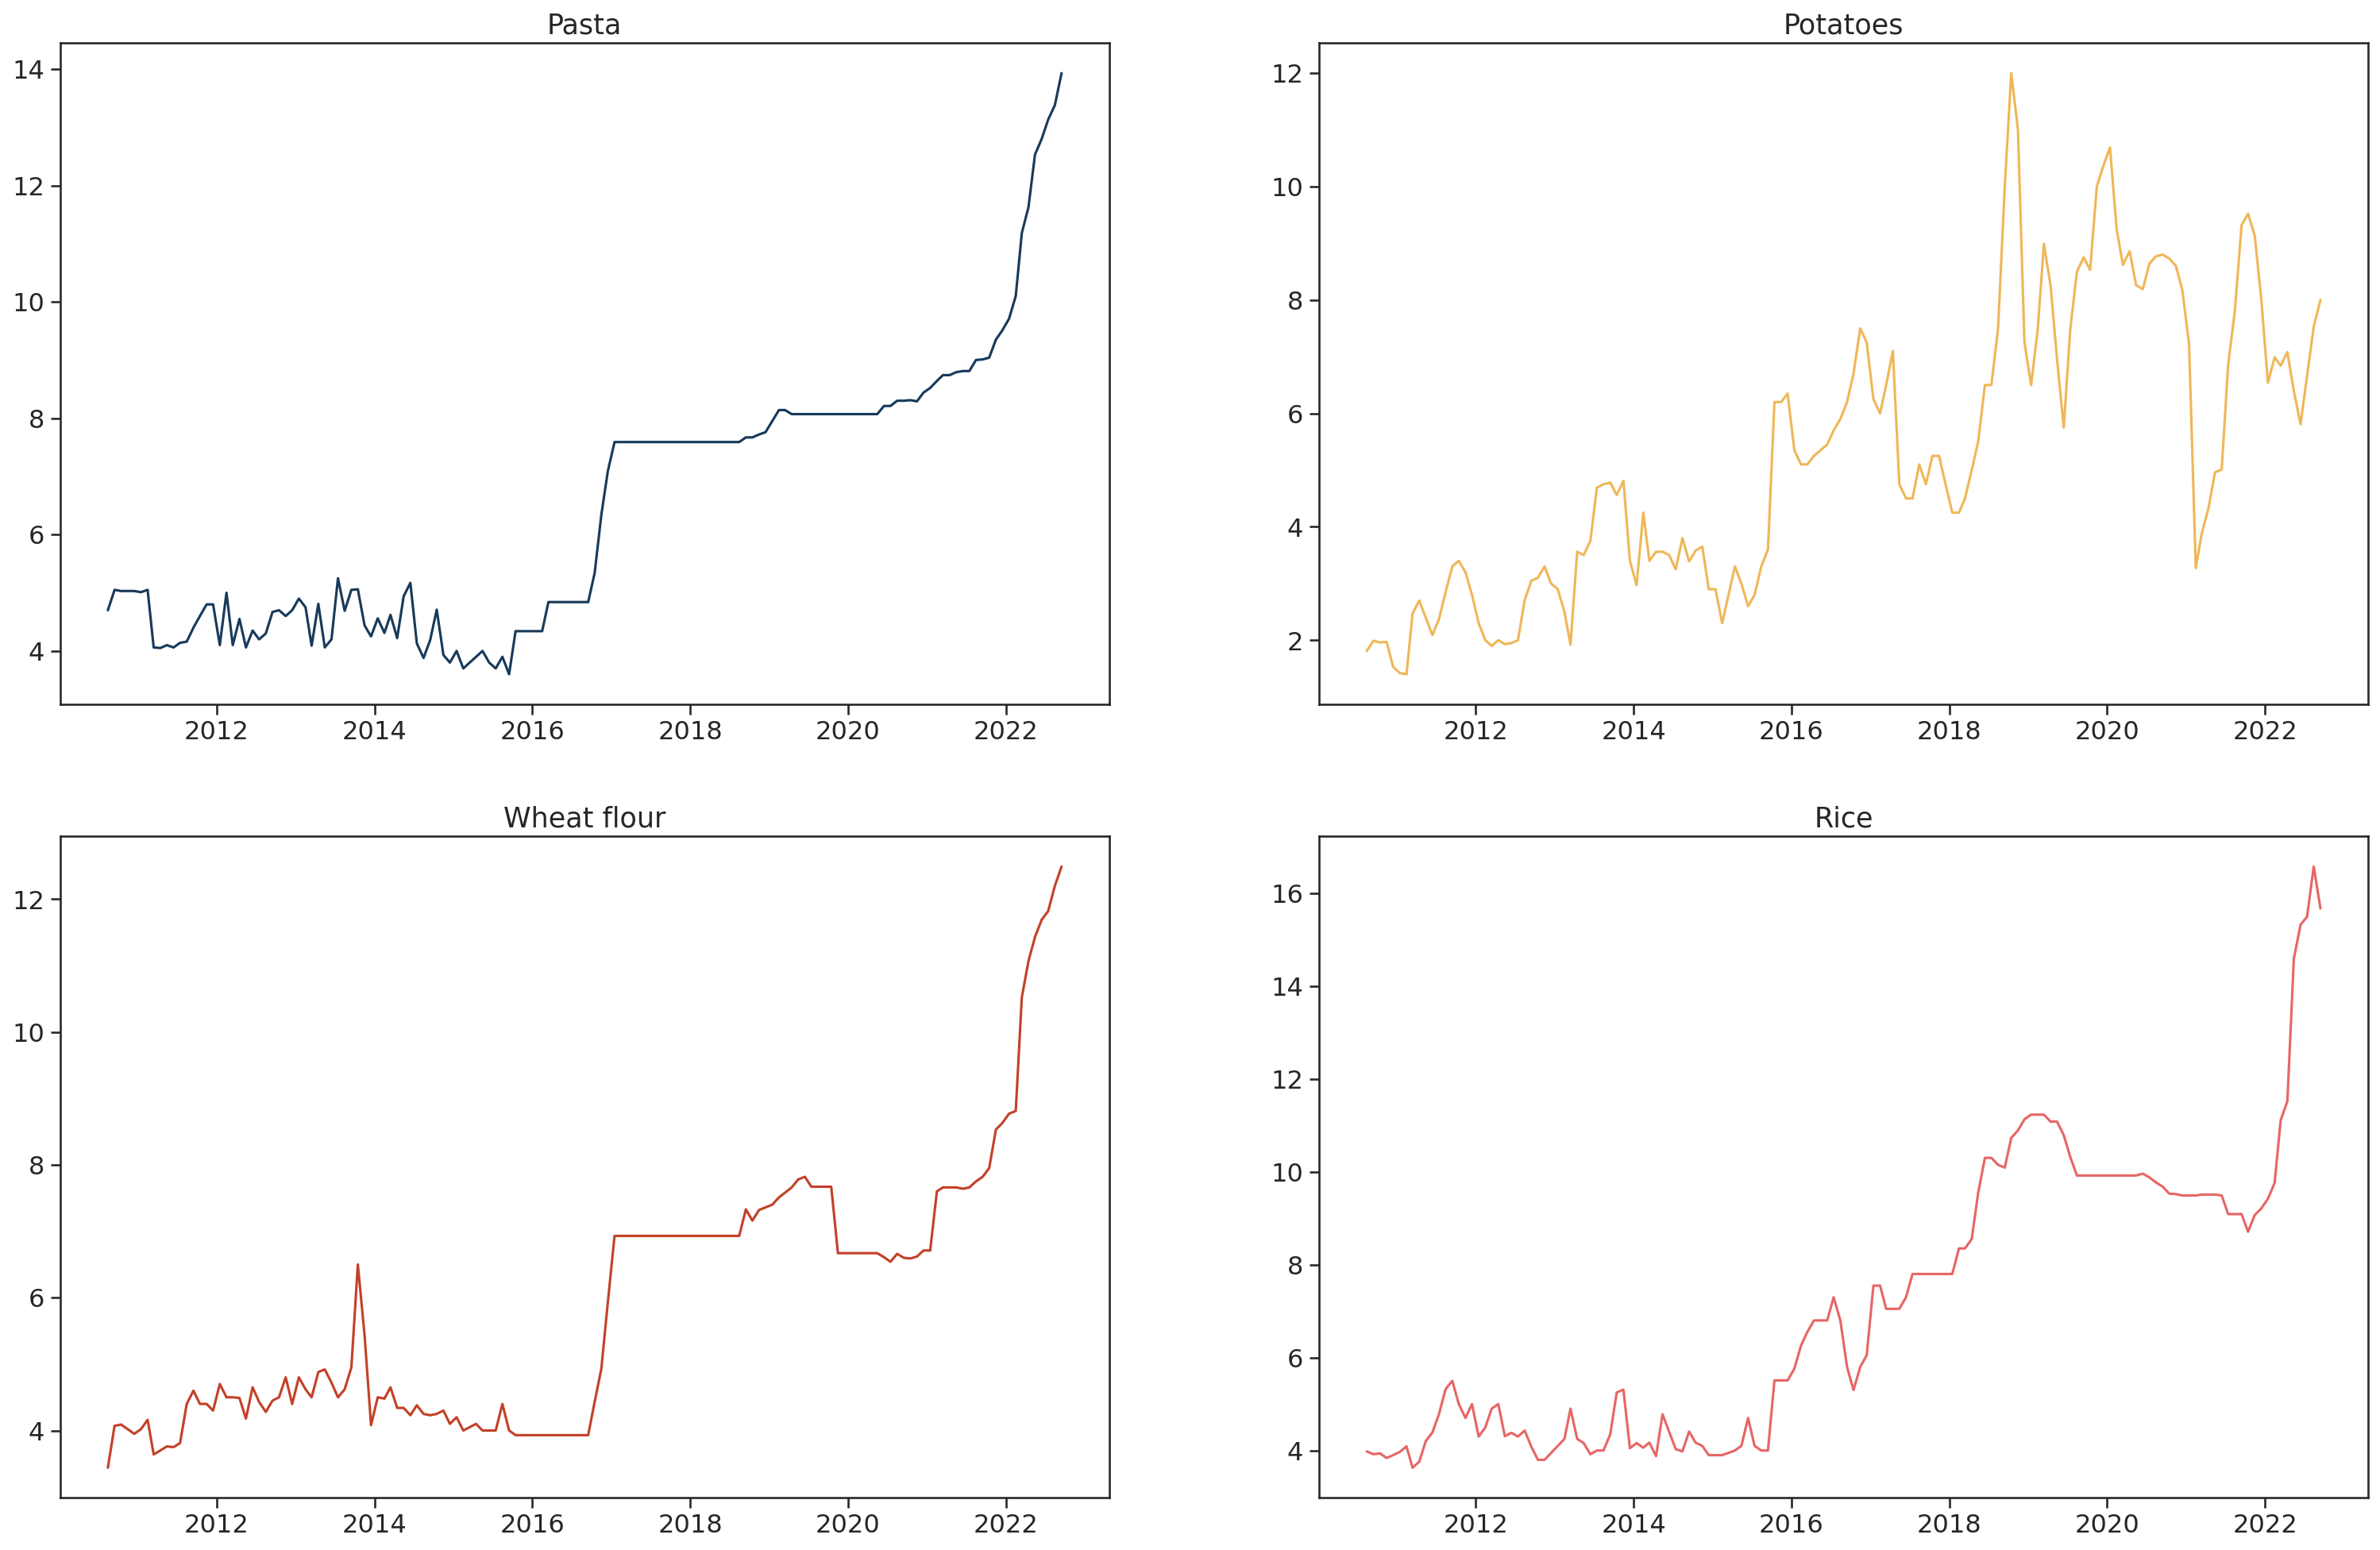

In [ ]:
cerelas=["Pasta","Potatoes","Wheat flour","Rice"]
sns.set(font_scale=1.4)
sns.set_style("ticks")
plt.figure(figsize=(25,25),dpi=150)            
for i,key in enumerate(cerelas):
  ax=plt.subplot(3,2,i+1)
  ax = sns.lineplot(data = df, x='date',y=df[df['food_name']==key]['price'],color=colors[i])
  ax.set_ylabel('')
  ax.set_xlabel('')
  plt.title(key)
plt.show() 

In [ ]:
cereals_data=df_years[df_years['food_category']=="cereals and tubers"]
cereals_data

,year,food_category,price_mean,price_min,price_max
0,2010,cereals and tubers,14.650000,13.93,15.03
6,2011,cereals and tubers,15.575833,13.80,17.80
12,2012,cereals and tubers,15.354167,12.10,16.50
18,2013,cereals and tubers,17.645000,15.41,21.37
24,2014,cereals and tubers,16.363333,14.70,17.62
30,2015,cereals and tubers,16.353636,13.90,20.13
37,2016,cereals and tubers,21.571667,19.38,26.32
44,2017,cereals and tubers,27.440833,26.32,28.67
51,2018,cereals and tubers,31.382500,26.57,37.56
58,2019,cereals and tubers,34.229167,32.43,35.94


Change in Price

In [ ]:
cereals_data['price_change'] = cereals_data['price_mean'].pct_change()
cereals_data

<ipython-input-22-f96b79fc6ee4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cereals_data['price_change'] = cereals_data['price_mean'].pct_change()


,year,food_category,price_mean,price_min,price_max,price_change
0,2010,cereals and tubers,14.650000,13.93,15.03,NaN
6,2011,cereals and tubers,15.575833,13.80,17.80,0.063197
12,2012,cereals and tubers,15.354167,12.10,16.50,-0.014231
18,2013,cereals and tubers,17.645000,15.41,21.37,0.149199
24,2014,cereals and tubers,16.363333,14.70,17.62,-0.072636
30,2015,cereals and tubers,16.353636,13.90,20.13,-0.000593
37,2016,cereals and tubers,21.571667,19.38,26.32,0.319075
44,2017,cereals and tubers,27.440833,26.32,28.67,0.272078
51,2018,cereals and tubers,31.382500,26.57,37.56,0.143642
58,2019,cereals and tubers,34.229167,32.43,35.94,0.090709


In [ ]:
cereals_data_mon=new_df[new_df['food_category']=="cereals and tubers"]

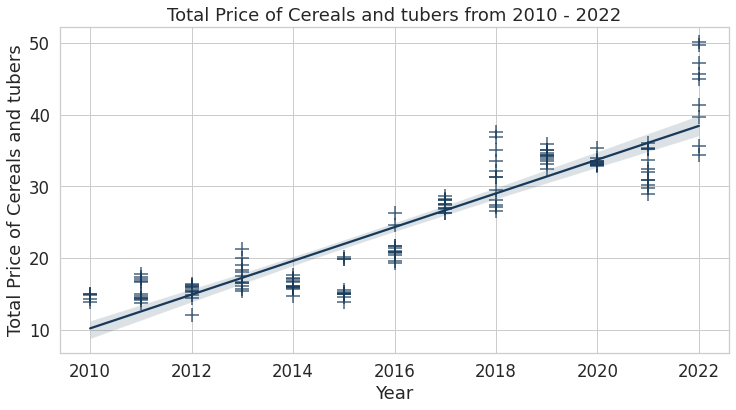

In [ ]:
plt.figure(figsize=(12, 6))

sns.set(font_scale=1.5)
sns.set_style('whitegrid') #white with grid

ax =sns.regplot(x="year", y="price",data=cereals_data_mon, color=colors[0], marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Price of Cereals and tubers')
ax.set_title('Total Price of Cereals and tubers from 2010 - 2022')
plt.show()

In [ ]:
norm_cereals = (cereals_data_mon['price'] - cereals_data_mon['price'].min()) / (cereals_data_mon['price'].max() - cereals_data_mon['price'].min())

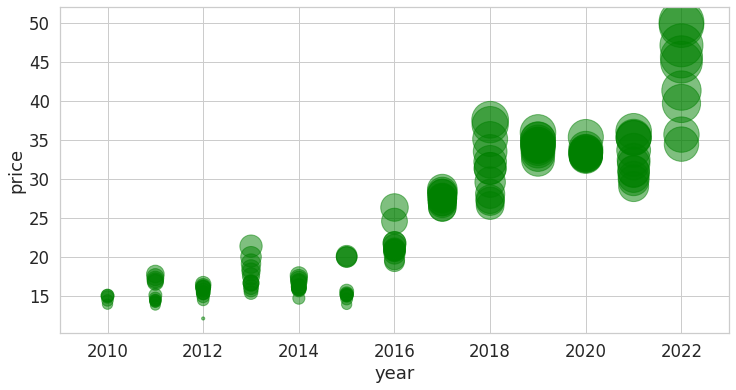

In [ ]:
ax0 = cereals_data_mon.plot(kind='scatter',
                    x='year',
                    y='price',
                    figsize=(12, 6),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_cereals * 2000 + 10,  # pass in weights 
                    xlim=(2009, 2023)
                    )

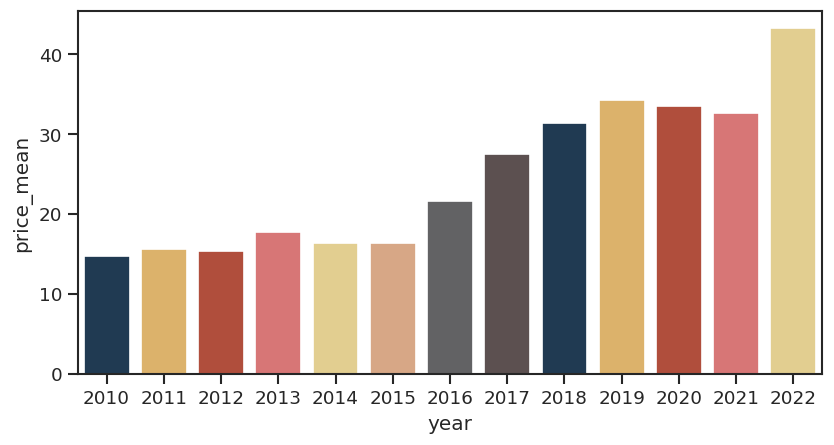

In [ ]:
plt.figure(figsize=(8,4),dpi=120)
sns.set(font_scale=1)
sns.set_style("ticks")
sns.barplot(x="year", y=df_years[df_years['food_category']=="cereals and tubers"]['price_mean'],data=df_years,palette=colors)

[Text(0, 0.5, '')]

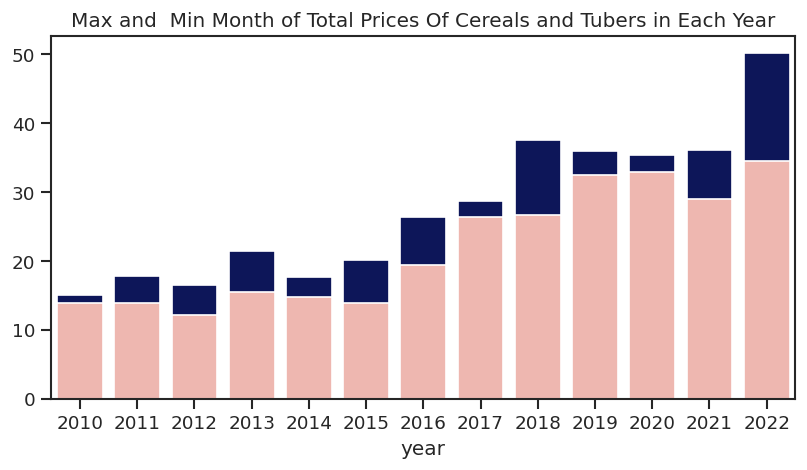

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4),dpi=120)
sns.set(font_scale=1)
sns.set_style("ticks")
sns.barplot(x=df_years['year'],y=cereals_data['price_max'],color='#000C66').set(ylabel=None,title='Max and  Min Month of Total Prices Of Cereals and Tubers in Each Year')
#axes[0].set_title('Distrbution Of Amount feature in Churn records')
sns.barplot(x=df_years['year'],y=cereals_data['price_min'],color='#F8AFA6').set(ylabel=None)

In [ ]:
cereals_data

,year,food_category,price_mean,price_min,price_max,price_change
0,2010,cereals and tubers,14.650000,13.93,15.03,NaN
6,2011,cereals and tubers,15.575833,13.80,17.80,0.063197
12,2012,cereals and tubers,15.354167,12.10,16.50,-0.014231
18,2013,cereals and tubers,17.645000,15.41,21.37,0.149199
24,2014,cereals and tubers,16.363333,14.70,17.62,-0.072636
30,2015,cereals and tubers,16.353636,13.90,20.13,-0.000593
37,2016,cereals and tubers,21.571667,19.38,26.32,0.319075
44,2017,cereals and tubers,27.440833,26.32,28.67,0.272078
51,2018,cereals and tubers,31.382500,26.57,37.56,0.143642
58,2019,cereals and tubers,34.229167,32.43,35.94,0.090709


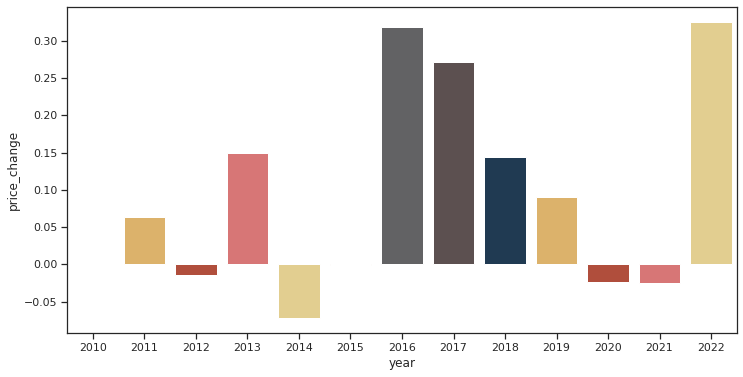

In [ ]:
plt.figure(figsize=(12,6))
plot = sns.barplot(x="year", y=cereals_data['price_change'],data=cereals_data,palette=colors)

# 🧂 **Miscellaneous Food**

In [ ]:
df[df['food_category']=='miscellaneous food']['food_name'].value_counts()

Sugar    145
Name: food_name, dtype: int64

In [ ]:
miscellaneous_data=df_years[df_years['food_category']=="miscellaneous food"]

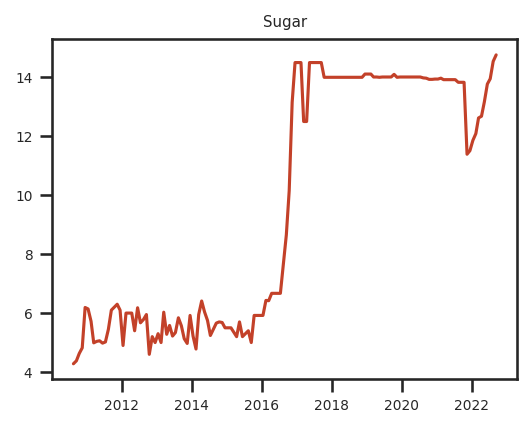

In [ ]:
sns.set(font_scale=0.6)
sns.set_style("ticks")
plt.figure(figsize=(4,3),dpi=150)            
ax = sns.lineplot(data = df, x=df['date'],y=df[df['food_name']=="Sugar"]['price'],color='#c34129')
ax.set_ylabel('')
ax.set_xlabel('')
plt.title("Sugar")
plt.show() 

**▶ Change in Price in Sugar From 2010 to 2022**

In [ ]:
miscellaneous_data['price_change'] = miscellaneous_data['price_mean'].pct_change()
miscellaneous_data

<ipython-input-34-ce6a549c630e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miscellaneous_data['price_change'] = miscellaneous_data['price_mean'].pct_change()


,year,food_category,price_mean,price_min,price_max,price_change
2,2010,miscellaneous food,4.860000,4.28,6.19,NaN
8,2011,miscellaneous food,5.591667,4.98,6.30,0.150549
14,2012,miscellaneous food,5.556667,4.60,6.18,-0.006259
20,2013,miscellaneous food,5.431667,4.97,6.03,-0.022496
26,2014,miscellaneous food,5.615000,4.78,6.41,0.033753
33,2015,miscellaneous food,5.505455,5.00,5.92,-0.019509
40,2016,miscellaneous food,8.295833,5.92,14.50,0.506839
47,2017,miscellaneous food,14.041667,12.50,14.50,0.692617
54,2018,miscellaneous food,14.009167,14.00,14.11,-0.002315
61,2019,miscellaneous food,14.032500,14.00,14.11,0.001666


In [ ]:
miscellaneous_data_mon=new_df[new_df['food_category']=="miscellaneous food"]

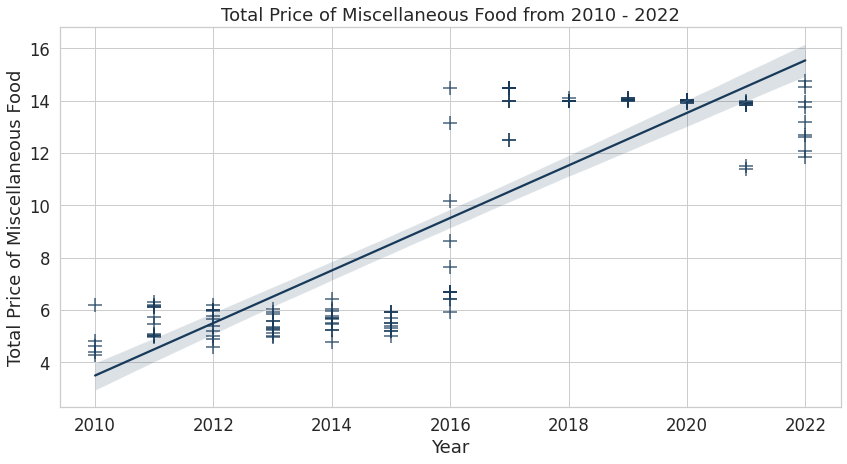

In [ ]:
plt.figure(figsize=(14, 7))
sns.set(font_scale=1.5)
sns.set_style('whitegrid') #white with grid
ax =sns.regplot(x="year", y="price",data=miscellaneous_data_mon, color=colors[0], marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Price of Miscellaneous Food')
ax.set_title('Total Price of Miscellaneous Food from 2010 - 2022')
plt.show()

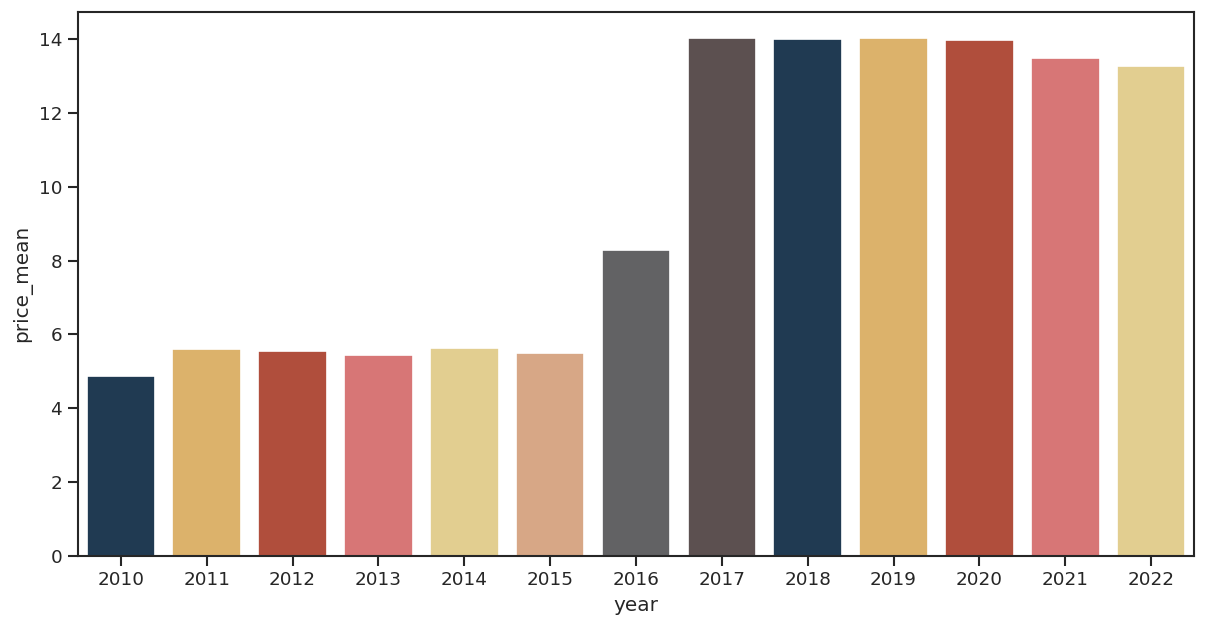

In [ ]:
plt.figure(figsize=(12,6),dpi=120)
sns.set(font_scale=1)
sns.set_style("ticks")
sns.barplot(x="year", y=df_years[df_years['food_category']=="miscellaneous food"]['price_mean'],data=df_years,palette=colors)

[Text(0, 0.5, '')]

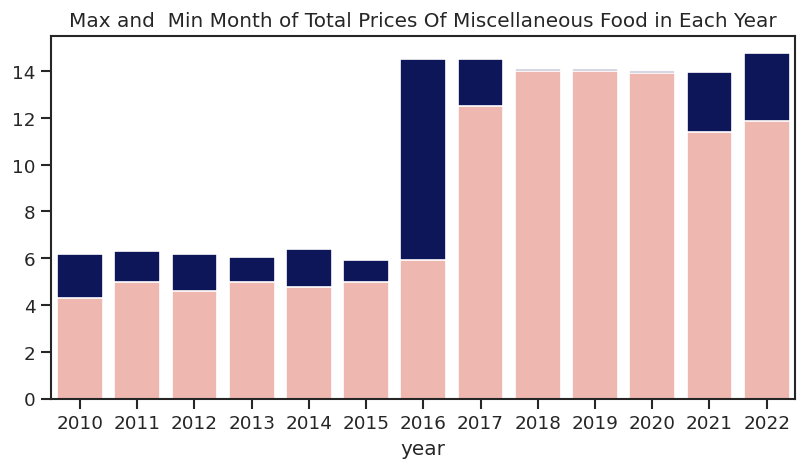

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4),dpi=120)
sns.set(font_scale=1)
sns.set_style("ticks")
sns.barplot(x=df_years['year'],y=miscellaneous_data['price_max'],color='#000C66').set(ylabel=None,title='Max and  Min Month of Total Prices Of Miscellaneous Food in Each Year')
#axes[0].set_title('Distrbution Of Amount feature in Churn records')
sns.barplot(x=df_years['year'],y=miscellaneous_data['price_min'],color='#F8AFA6').set(ylabel=None)

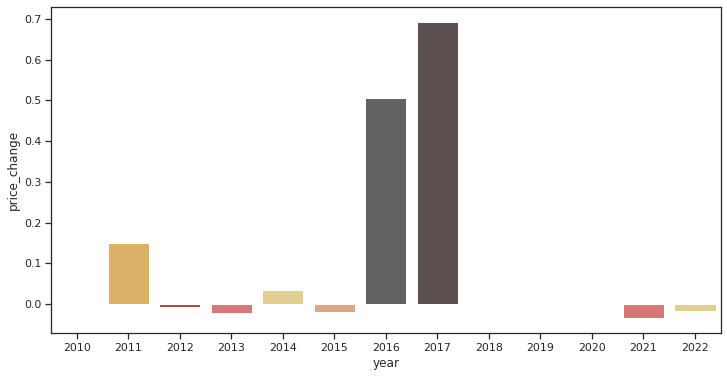

In [ ]:
plt.figure(figsize=(12,6))
plot = sns.barplot(x="year", y=miscellaneous_data['price_change'],data=miscellaneous_data,palette=colors)

# 🍖🐟  **Meat,Fish and Eggs**

In [ ]:
df[df['food_category']=='meat, fish and eggs']['food_name'].value_counts()

Meat (chicken, frozen)        145
Eggs                          116
Meat (beef, without bones)     84
Meat (beef)                    61
Fish (tilapia)                  3
Name: food_name, dtype: int64

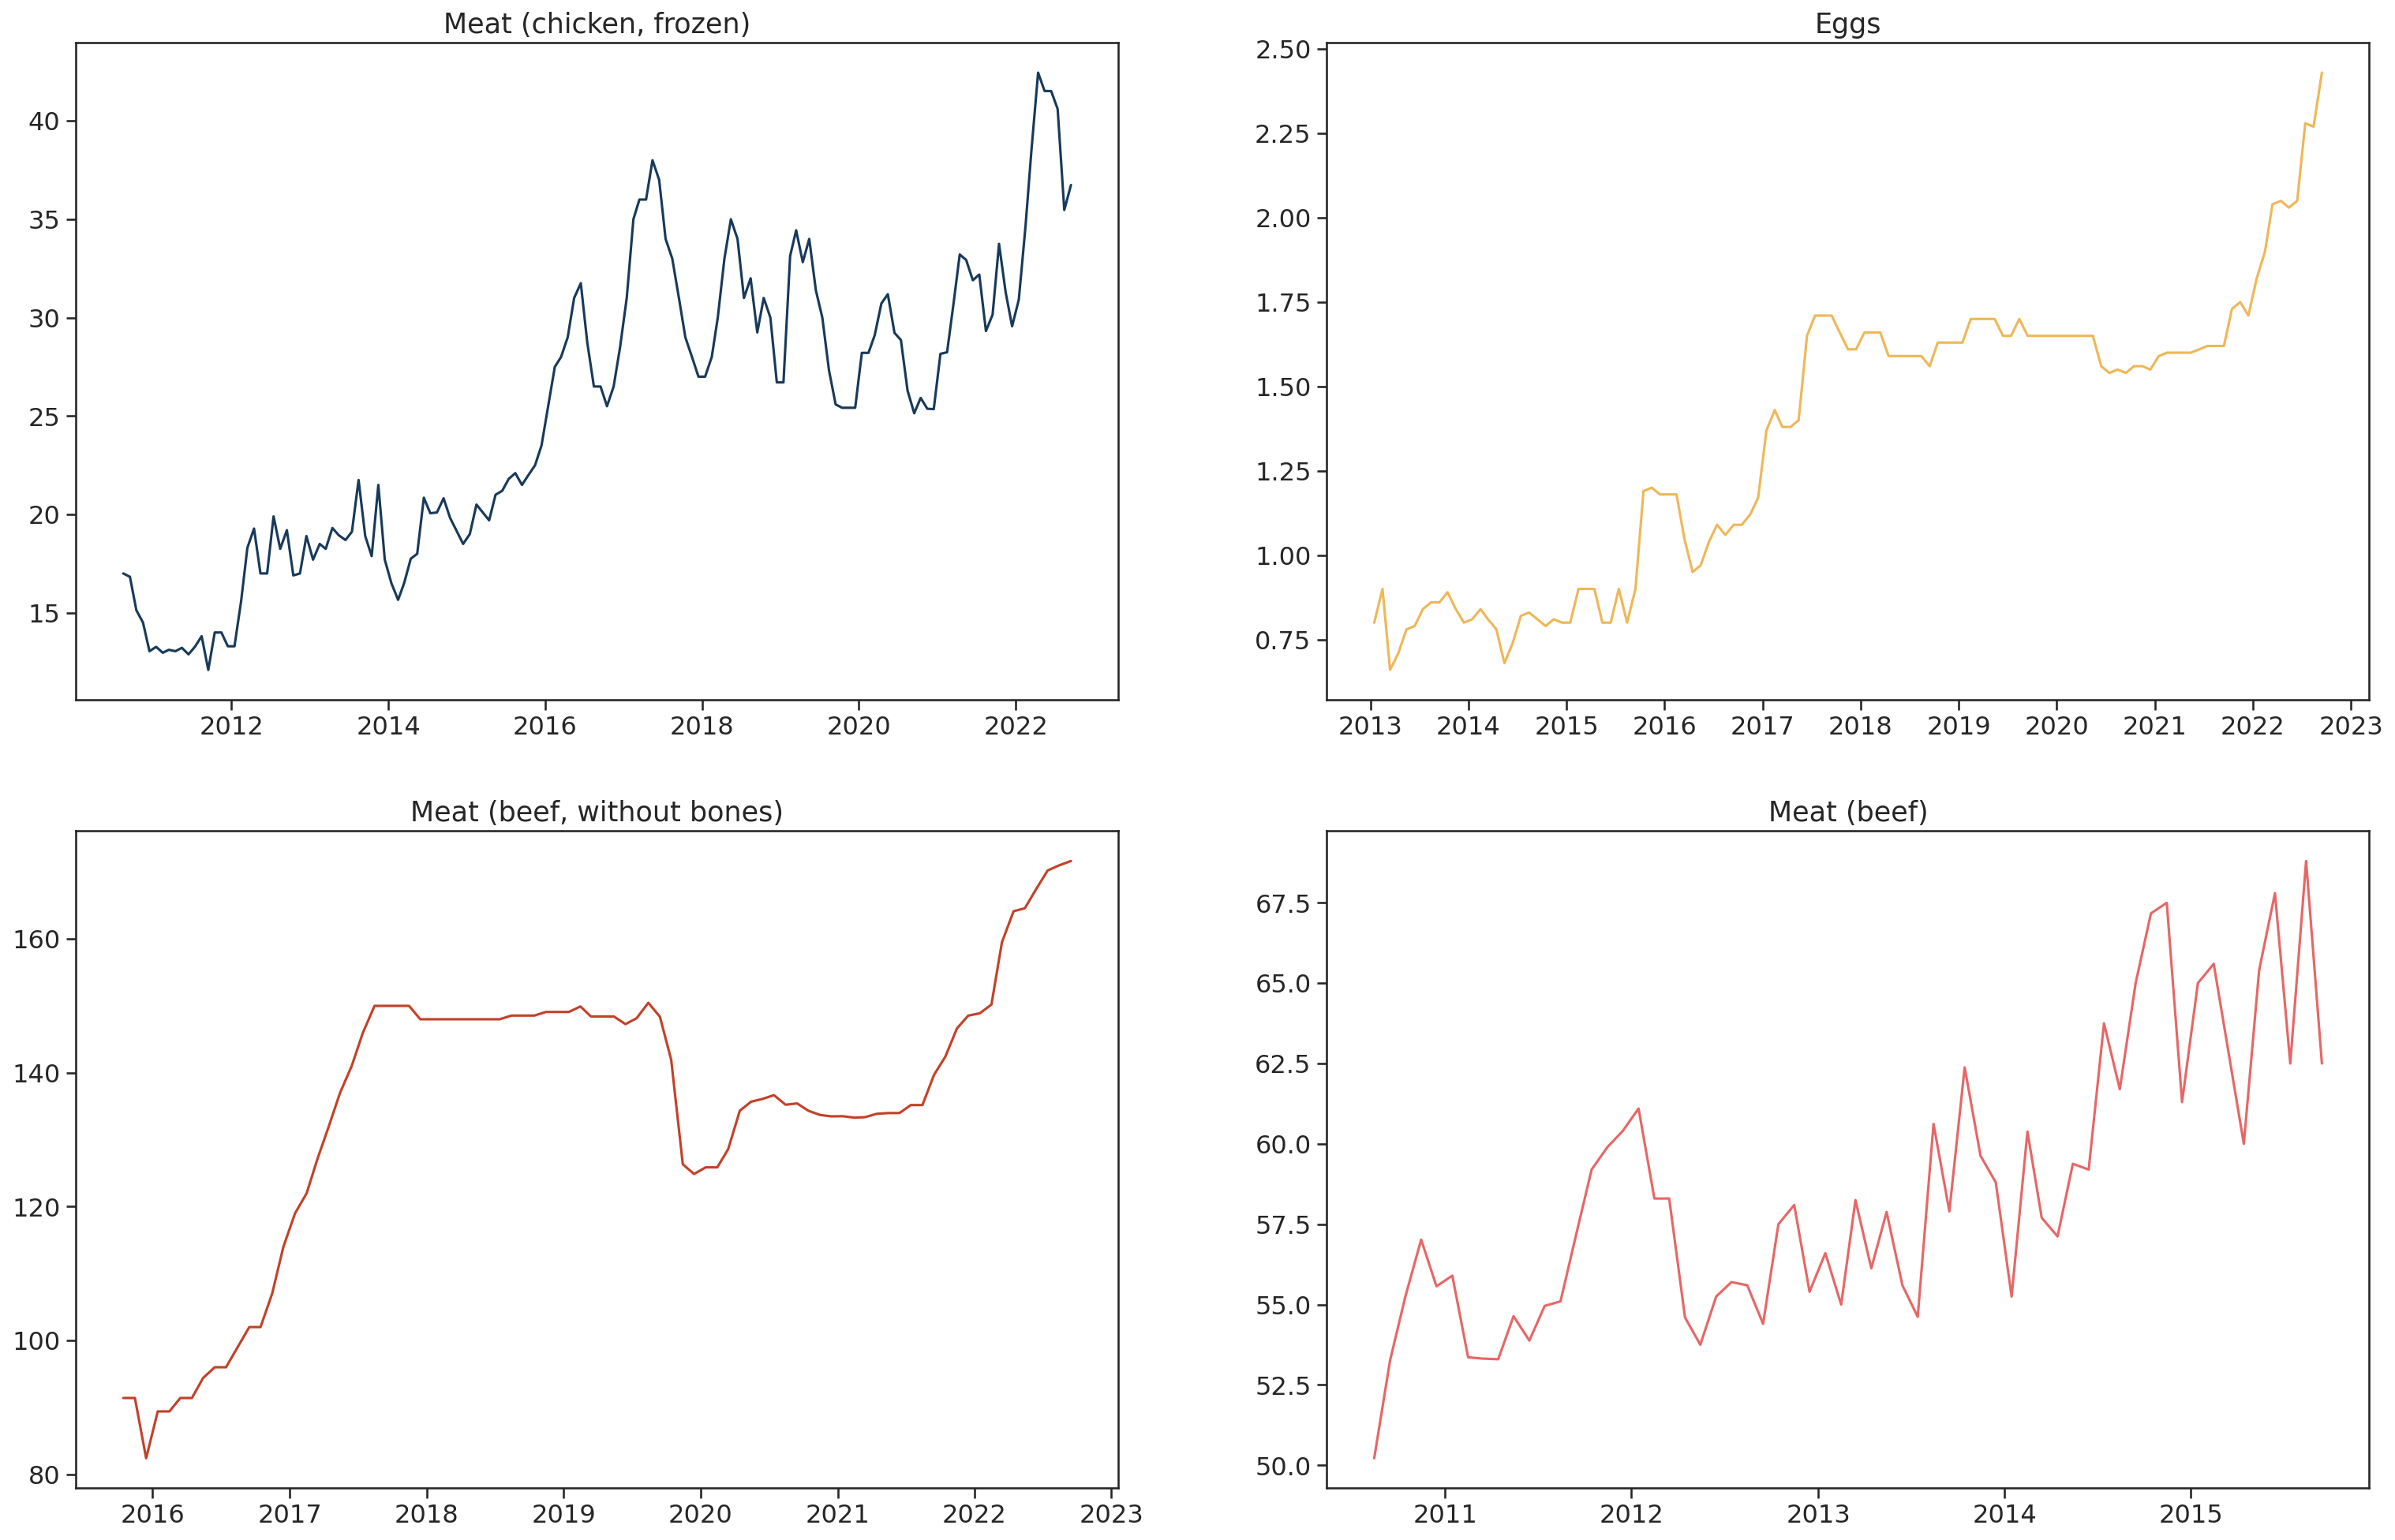

In [ ]:
Meat_Fish_Eggs=["Meat (chicken, frozen)","Eggs","Meat (beef, without bones)","Meat (beef)"]
sns.set(font_scale=1.4)
sns.set_style("ticks")
plt.figure(figsize=(25,25),dpi=150)
for n, col in enumerate(Meat_Fish_Eggs):
   ax = plt.subplot(3, 2,n+1)
   ax = sns.lineplot(data = df, x='date',y=df[df['food_name']==col]['price'],color=colors[n])
   ax.set_title(str(col))
   ax.set_ylabel('')
   ax.set_xlabel('')   

In [ ]:
meat_data=df_years[df_years['food_category']=='meat, fish and eggs']

 Change in Price

In [ ]:
meat_data['price_change'] = meat_data['price_mean'].pct_change()
meat_data

<ipython-input-43-1ce2e9c3f9cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meat_data['price_change'] = meat_data['price_mean'].pct_change()


,year,food_category,price_mean,price_min,price_max,price_change
1,2010,"meat, fish and eggs",69.566000,67.22,71.52,NaN
7,2011,"meat, fish and eggs",69.180833,66.33,73.90,-0.005537
13,2012,"meat, fish and eggs",74.052500,70.75,76.60,0.070419
19,2013,"meat, fish and eggs",77.615833,74.40,83.23,0.048119
25,2014,"meat, fish and eggs",80.724167,72.56,87.79,0.040048
31,2015,"meat, fish and eggs",99.633636,80.60,137.60,0.234248
38,2016,"meat, fish and eggs",126.665833,116.08,143.67,0.271316
45,2017,"meat, fish and eggs",173.801667,151.37,184.71,0.372127
52,2018,"meat, fish and eggs",180.514167,176.66,184.59,0.038622
59,2019,"meat, fish and eggs",175.279167,151.94,184.74,-0.029000


In [ ]:
meat_data_mon=new_df[new_df['food_category']=="meat, fish and eggs"]

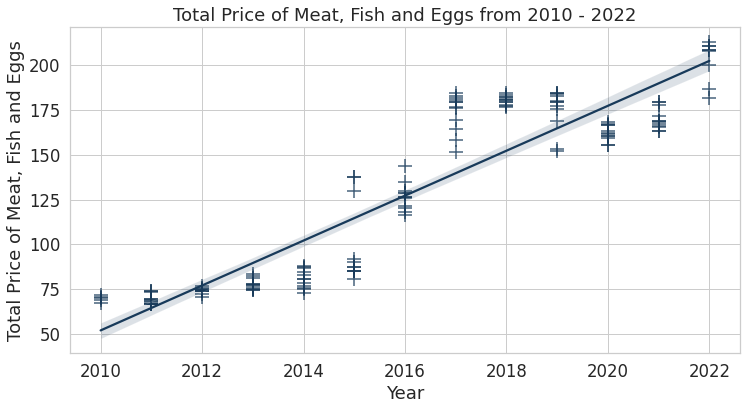

In [ ]:
plt.figure(figsize=(12, 6))

sns.set(font_scale=1.5)
sns.set_style('whitegrid') #white with grid

ax =sns.regplot(x="year", y="price",data=meat_data_mon, color=colors[0], marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Price of Meat, Fish and Eggs')
ax.set_title('Total Price of Meat, Fish and Eggs from 2010 - 2022')
plt.show()

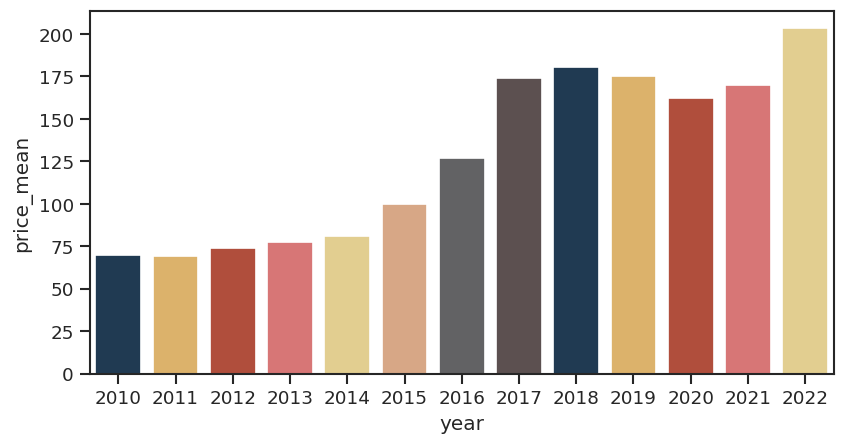

In [ ]:
plt.figure(figsize=(8,4),dpi=120)
sns.set(font_scale=1)
sns.set_style("ticks")
sns.barplot(x="year", y=df_years[df_years['food_category']=="meat, fish and eggs"]['price_mean'],data=df_years,palette=colors)

[Text(0, 0.5, '')]

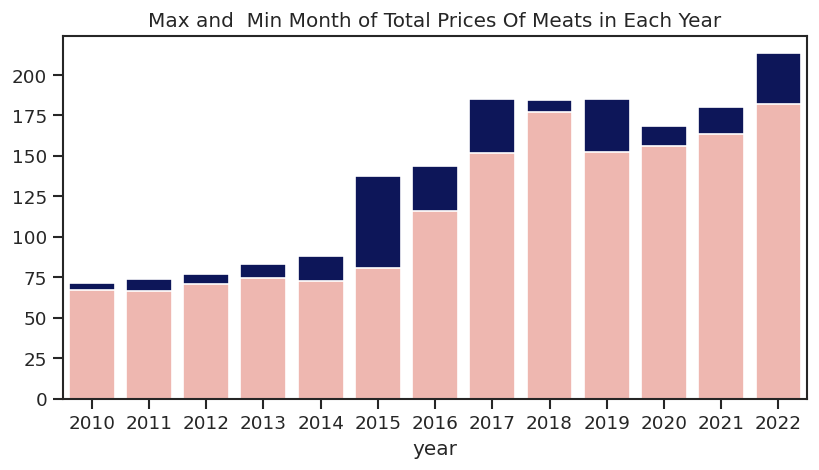

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4),dpi=120)
sns.set(font_scale=1)
sns.set_style("ticks")
sns.barplot(x=df_years['year'],y=meat_data['price_max'],color='#000C66').set(ylabel=None,title='Max and  Min Month of Total Prices Of Meats in Each Year')
sns.barplot(x=df_years['year'],y=meat_data['price_min'],color='#F8AFA6').set(ylabel=None)

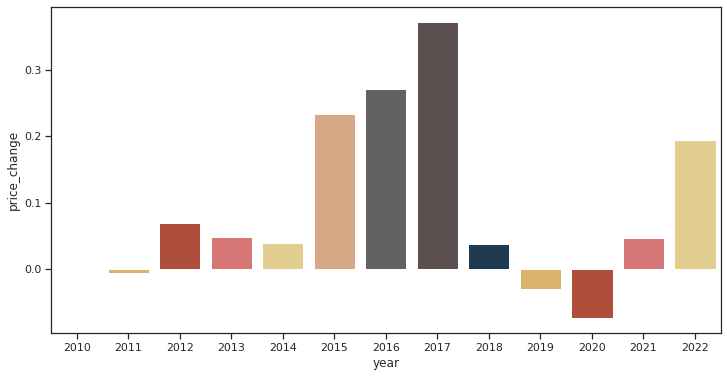

In [ ]:
plt.figure(figsize=(12,6))
plot = sns.barplot(x="year", y=meat_data['price_change'],data=meat_data,palette=colors)

# 🧈 🍞 **Oils and Fats**

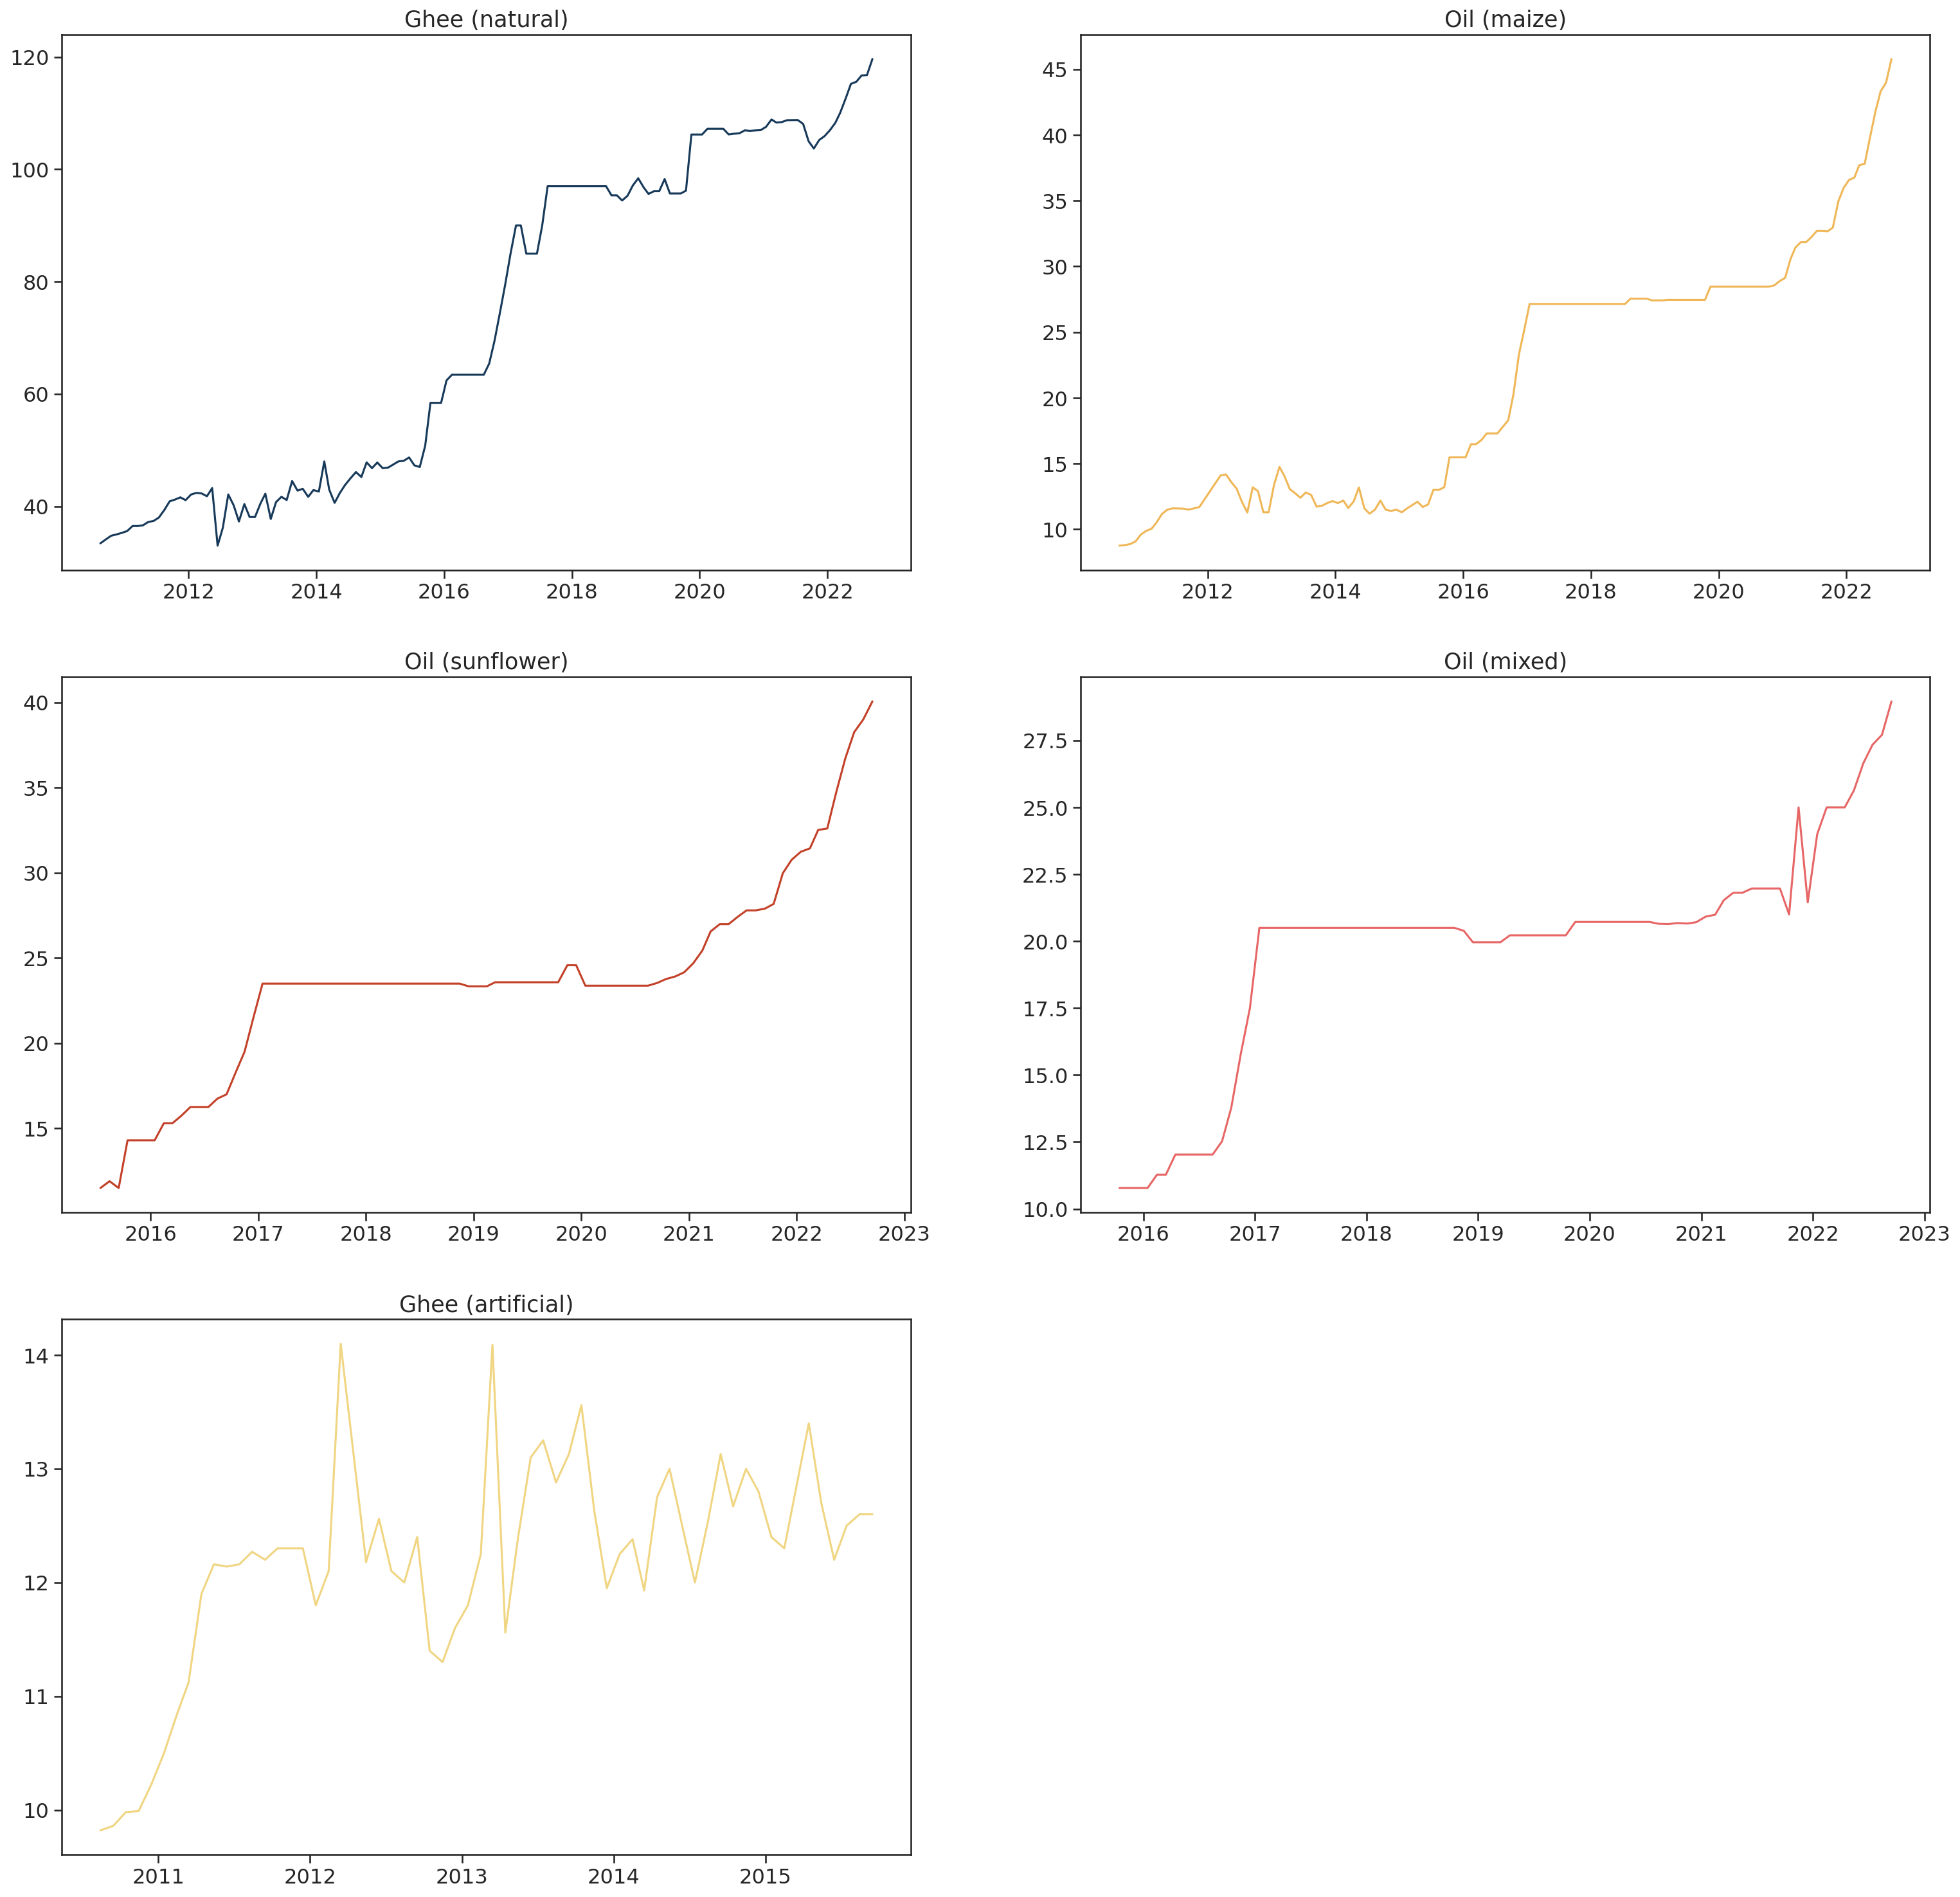

In [ ]:
Oils_and_fats=["Ghee (natural)", "Oil (maize)","Oil (sunflower)","Oil (mixed)","Ghee (artificial)"]
plt.figure(figsize=(25,25),dpi=150)
sns.set(font_scale=1.4)
sns.set_style("ticks")
for n, col in enumerate(Oils_and_fats):
   ax = plt.subplot(3, 2,n+1)
   ax = sns.lineplot(data = df, x='date',y=df[df['food_name']==col]['price'],color=colors[n])
   ax.set_title(str(col))
   ax.set_ylabel('')
   ax.set_xlabel('')

In [ ]:
oil_fats_data=df_years[df_years['food_category']=='oil and fats']
oil_fats_data['price_change'] = meat_data['price_mean'].pct_change()
oil_fats_data_mon=new_df[new_df['food_category']=="oil and fats"]    

<ipython-input-50-eb96b0360b84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil_fats_data['price_change'] = meat_data['price_mean'].pct_change()


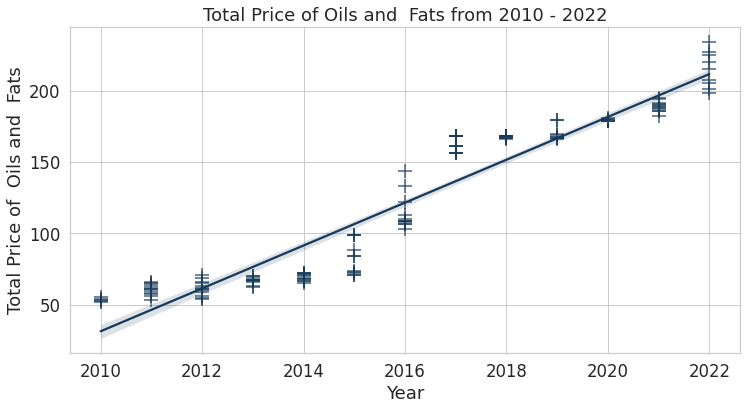

In [ ]:
plt.figure(figsize=(12, 6))

sns.set(font_scale=1.5)
sns.set_style('whitegrid') #white with grid

ax =sns.regplot(x="year", y="price",data=oil_fats_data_mon, color=colors[0], marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Price of  Oils and  Fats')
ax.set_title('Total Price of Oils and  Fats from 2010 - 2022')
plt.show()

# 🍅 🧄  **Vegtables And Fruits**

In [ ]:
df[df['food_category']=='vegetables and fruits']['food_name'].value_counts()

Garlic            145
Tomatoes          145
Onions (red)      142
Onions (white)     64
Name: food_name, dtype: int64

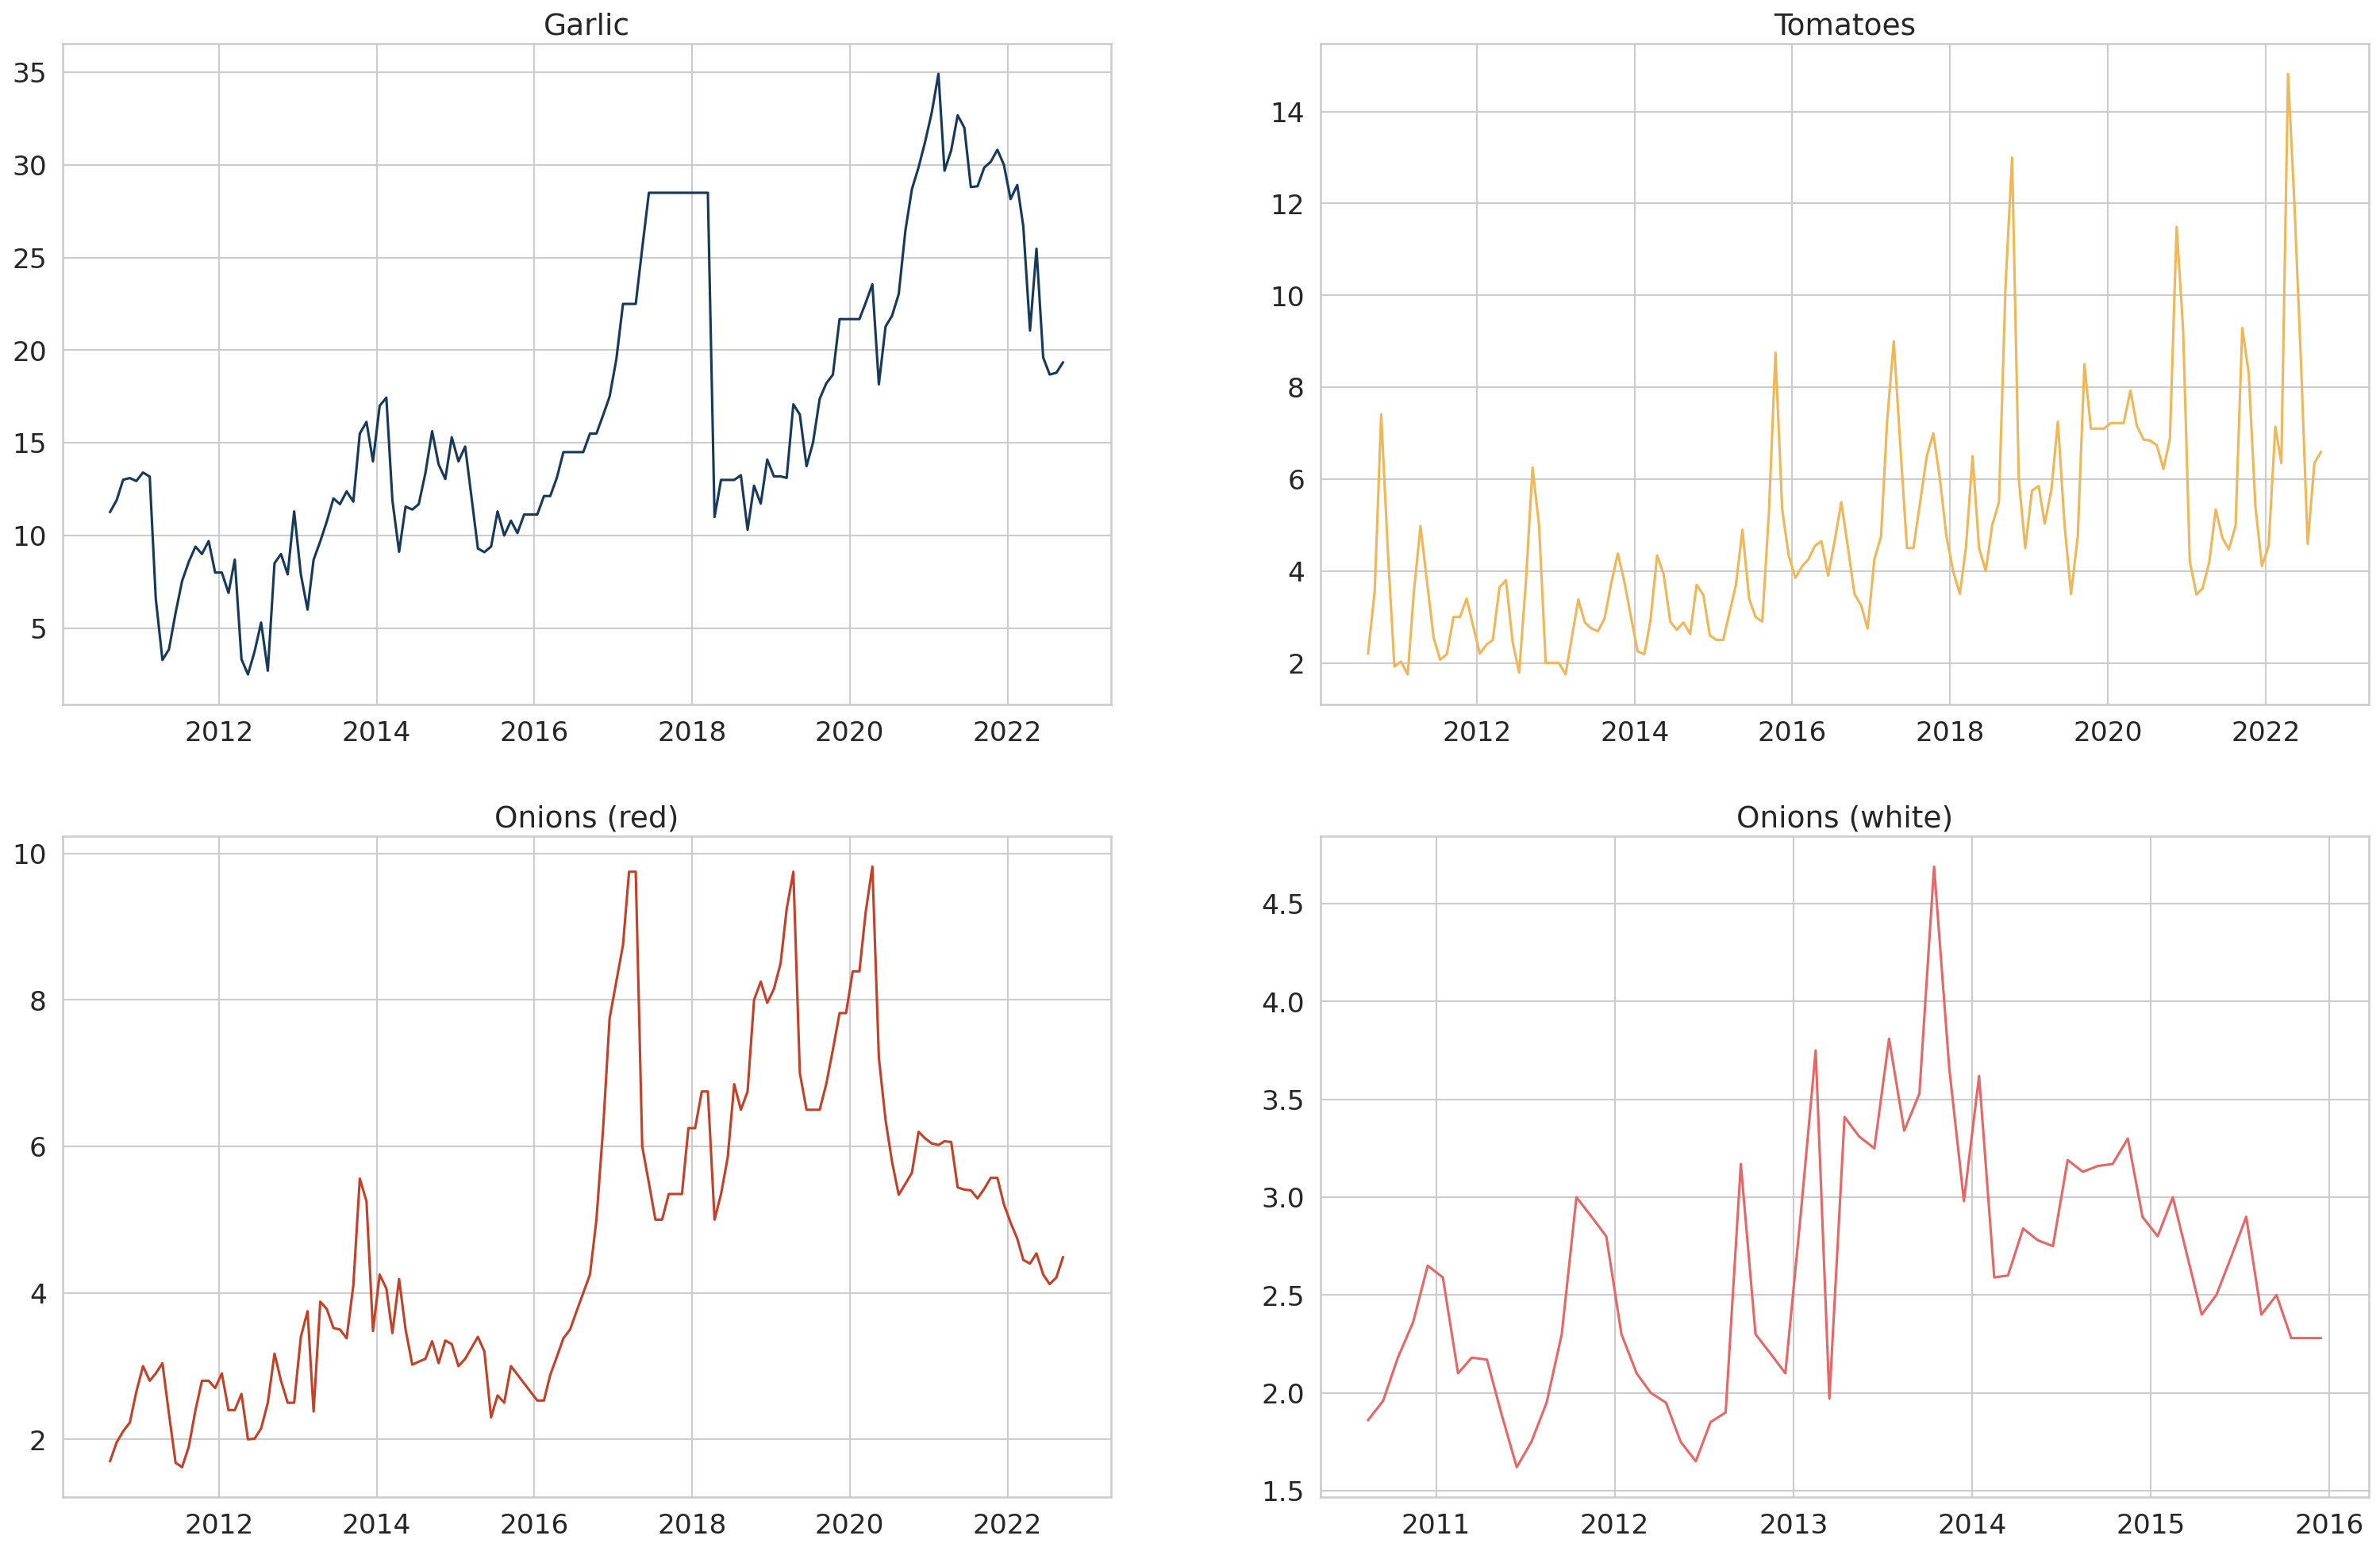

In [ ]:
Vegtablles_and_Fruits=["Garlic","Tomatoes","Onions (red)","Onions (white)"]
plt.figure(figsize=(25,25),dpi=150)
for n, col in enumerate(Vegtablles_and_Fruits):
   ax = plt.subplot(3, 2,n+1)
   ax = sns.lineplot(data = df, x='date',y=df[df['food_name']==col]['price'],color=colors[n])
   ax.set_title(str(col))
   ax.set_ylabel('')
   ax.set_xlabel('')

# 🥛 🧀 **Milk and Dairy**

In [ ]:
df[df['food_category']=='milk and dairy']['food_name'].value_counts()

Cheese            84
Cheese (picon)    84
Milk               3
Name: food_name, dtype: int64

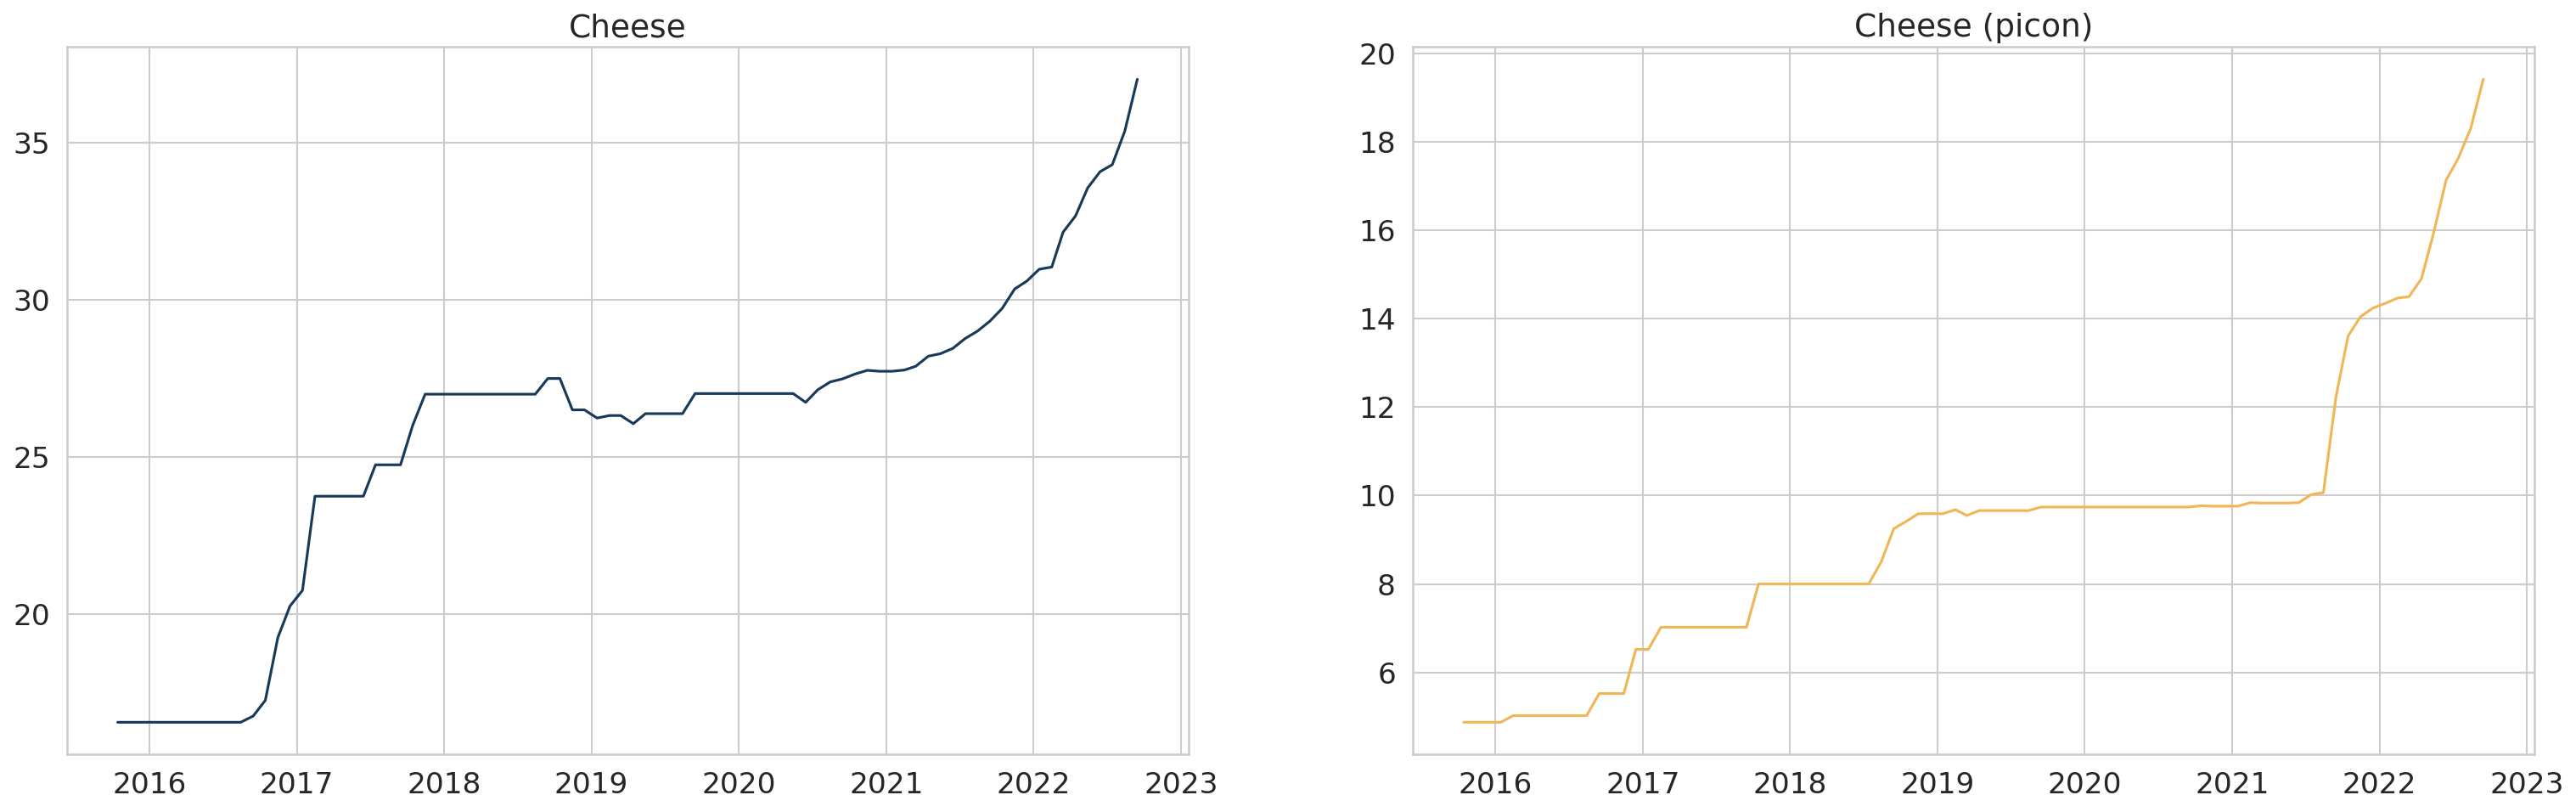

In [ ]:
Milk_and_dairy=["Cheese","Cheese (picon)"]
plt.figure(figsize=(25,25),dpi=150)
for n, col in enumerate(Milk_and_dairy):
   ax = plt.subplot(3, 2,n+1)
   ax = sns.lineplot(data = df, x='date',y=df[df['food_name']==col]['price'],color=colors[n])
   ax.set_title(str(col))
   ax.set_ylabel('')
   ax.set_xlabel('')

# 🐔 🥚  **Chicken and Eggs**

In [ ]:
chicken_data=df[df['food_name']=="Meat (chicken, frozen)"]
chicken_data["price"] = chicken_data["price"] * 1.6
chicken_data

<ipython-input-56-6ba1e7b9c836>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicken_data["price"] = chicken_data["price"] * 1.6


,index,date,food_category,food_name,unit,price,usdprice,year
5,5,2010-08-15,"meat, fish and eggs","Meat (chicken, frozen)",KG,27.200,0.7351,2010
21,21,2010-09-15,"meat, fish and eggs","Meat (chicken, frozen)",KG,26.928,0.7276,2010
37,37,2010-10-15,"meat, fish and eggs","Meat (chicken, frozen)",KG,24.208,0.6545,2010
53,53,2010-11-15,"meat, fish and eggs","Meat (chicken, frozen)",KG,23.200,0.6272,2010
69,69,2010-12-15,"meat, fish and eggs","Meat (chicken, frozen)",KG,20.880,0.5645,2010
...,...,...,...,...,...,...,...,...
2519,2519,2022-05-15,"meat, fish and eggs","Meat (chicken, frozen)",KG,66.432,1.7955,2022
2538,2538,2022-06-15,"meat, fish and eggs","Meat (chicken, frozen)",KG,66.416,1.7950,2022
2557,2557,2022-07-15,"meat, fish and eggs","Meat (chicken, frozen)",KG,64.960,1.7557,2022
2576,2576,2022-08-15,"meat, fish and eggs","Meat (chicken, frozen)",KG,56.752,1.5338,2022


In [ ]:
eggs_data=df[df['food_name']=="Eggs"]
eggs_data["price"] = eggs_data["price"] * 10
eggs_data

<ipython-input-57-1dc4474fd814>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eggs_data["price"] = eggs_data["price"] * 10


,index,date,food_category,food_name,unit,price,usdprice,year
463,463,2013-01-15,"meat, fish and eggs",Eggs,Unit,8.0,0.0346,2013
480,480,2013-02-15,"meat, fish and eggs",Eggs,Unit,9.0,0.0389,2013
497,497,2013-03-15,"meat, fish and eggs",Eggs,Unit,6.6,0.0285,2013
514,514,2013-04-15,"meat, fish and eggs",Eggs,Unit,7.1,0.0307,2013
531,531,2013-05-15,"meat, fish and eggs",Eggs,Unit,7.8,0.0337,2013
...,...,...,...,...,...,...,...,...
2517,2517,2022-05-15,"meat, fish and eggs",Eggs,Unit,20.3,0.0878,2022
2536,2536,2022-06-15,"meat, fish and eggs",Eggs,Unit,20.5,0.0886,2022
2555,2555,2022-07-15,"meat, fish and eggs",Eggs,Unit,22.8,0.0986,2022
2574,2574,2022-08-15,"meat, fish and eggs",Eggs,Unit,22.7,0.0982,2022


In [ ]:
chicken_egg=pd.concat([chicken_data, eggs_data]).groupby(['date']).sum().reset_index()
chicken_egg

,date,index,price,usdprice,year
0,2010-08-15,5,27.200,0.7351,2010
1,2010-09-15,21,26.928,0.7276,2010
2,2010-10-15,37,24.208,0.6545,2010
3,2010-11-15,53,23.200,0.6272,2010
4,2010-12-15,69,20.880,0.5645,2010
...,...,...,...,...,...
140,2022-05-15,5036,86.732,1.8833,4044
141,2022-06-15,5074,86.916,1.8836,4044
142,2022-07-15,5112,87.760,1.8543,4044
143,2022-08-15,5150,79.452,1.6320,4044


In [ ]:
chicken_egg["date"] = pd.to_datetime(chicken_egg["date"])
chicken_egg['year'] = pd.DatetimeIndex(chicken_egg['date']).year

In [ ]:
chicken_egg

,date,index,price,usdprice,year
0,2010-08-15,5,27.200,0.7351,2010
1,2010-09-15,21,26.928,0.7276,2010
2,2010-10-15,37,24.208,0.6545,2010
3,2010-11-15,53,23.200,0.6272,2010
4,2010-12-15,69,20.880,0.5645,2010
...,...,...,...,...,...
140,2022-05-15,5036,86.732,1.8833,2022
141,2022-06-15,5074,86.916,1.8836,2022
142,2022-07-15,5112,87.760,1.8543,2022
143,2022-08-15,5150,79.452,1.6320,2022


In [ ]:
df[df['food_category']=='meat, fish and eggs']['food_name'].value_counts()

Meat (chicken, frozen)        145
Eggs                          116
Meat (beef, without bones)     84
Meat (beef)                    61
Fish (tilapia)                  3
Name: food_name, dtype: int64

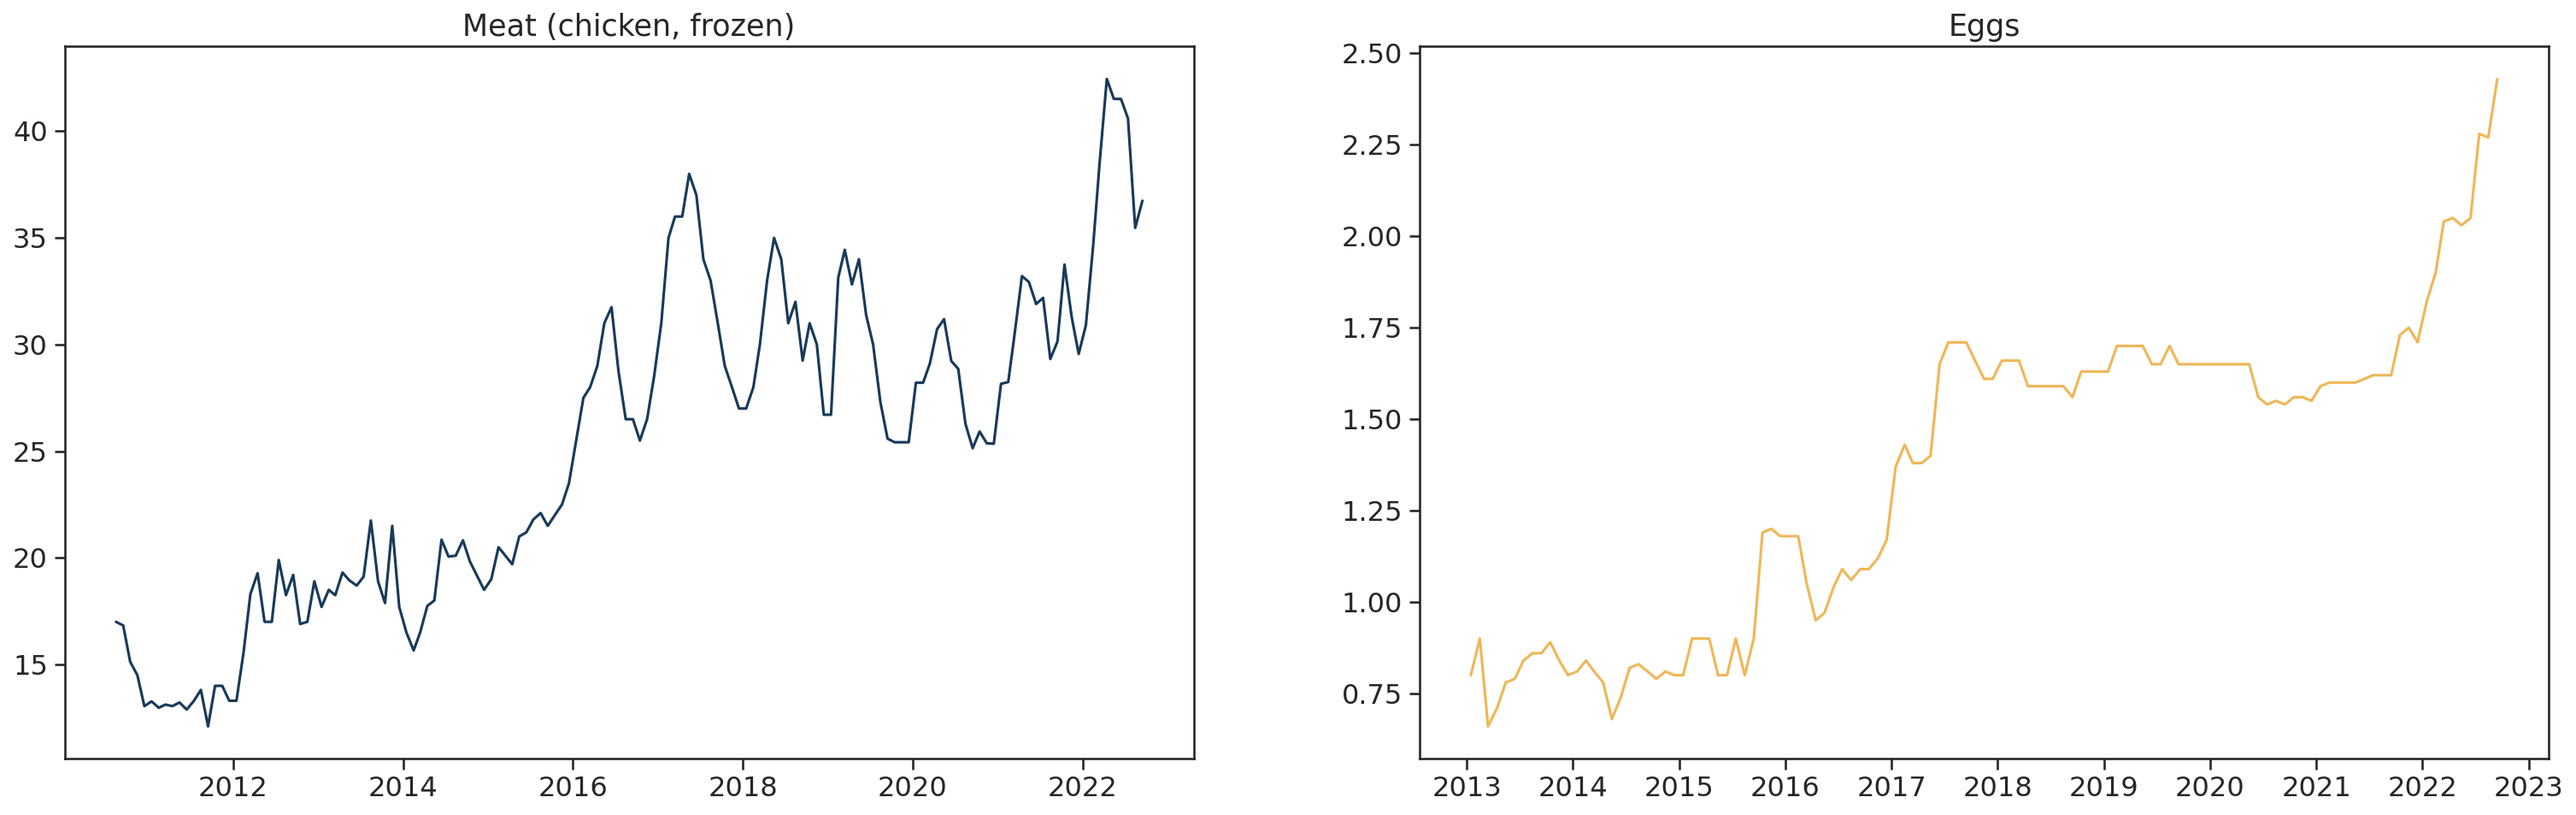

In [ ]:
Chicken_Eggs=["Meat (chicken, frozen)","Eggs"]
sns.set(font_scale=1.4)
sns.set_style("ticks")
plt.figure(figsize=(25,25),dpi=150)
for n, col in enumerate(Chicken_Eggs):
   ax = plt.subplot(3, 2,n+1)
   ax = sns.lineplot(data = df, x='date',y=df[df['food_name']==col]['price'],color=colors[n])
   ax.set_title(str(col))
   ax.set_ylabel('')
   ax.set_xlabel('')   

 Change in Price

In [ ]:
meat_data['price_change'] = meat_data['price_mean'].pct_change()
meat_data_mon=df[(df['food_name'] =="Meat (beef, without bones)")]
#df[(df['food_name'] =="Meat (beef, without bones)") | (df['food_name']=="Eggs")]
meat_data_mon

<ipython-input-63-151ba93bd50d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meat_data['price_change'] = meat_data['price_mean'].pct_change()


,index,date,food_category,food_name,unit,price,usdprice,year
1012,1012,2015-10-15,"meat, fish and eggs","Meat (beef, without bones)",KG,91.40,3.9524,2015
1033,1033,2015-11-15,"meat, fish and eggs","Meat (beef, without bones)",KG,91.40,3.9524,2015
1054,1054,2015-12-15,"meat, fish and eggs","Meat (beef, without bones)",KG,82.40,3.5632,2015
1074,1074,2016-01-15,"meat, fish and eggs","Meat (beef, without bones)",KG,89.40,3.8659,2016
1093,1093,2016-02-15,"meat, fish and eggs","Meat (beef, without bones)",KG,89.40,3.8659,2016
...,...,...,...,...,...,...,...,...
2518,2518,2022-05-15,"meat, fish and eggs","Meat (beef, without bones)",KG,164.59,7.1174,2022
2537,2537,2022-06-15,"meat, fish and eggs","Meat (beef, without bones)",KG,167.52,7.2441,2022
2556,2556,2022-07-15,"meat, fish and eggs","Meat (beef, without bones)",KG,170.24,7.3617,2022
2575,2575,2022-08-15,"meat, fish and eggs","Meat (beef, without bones)",KG,171.01,7.3950,2022


In [ ]:
meat_data_mon=df[(df['food_name'] =="Meat (beef, without bones)")]
#df[(df['food_name'] =="Meat (beef, without bones)") | (df['food_name']=="Eggs")]
meat_data_mon

,index,date,food_category,food_name,unit,price,usdprice,year
1012,1012,2015-10-15,"meat, fish and eggs","Meat (beef, without bones)",KG,91.40,3.9524,2015
1033,1033,2015-11-15,"meat, fish and eggs","Meat (beef, without bones)",KG,91.40,3.9524,2015
1054,1054,2015-12-15,"meat, fish and eggs","Meat (beef, without bones)",KG,82.40,3.5632,2015
1074,1074,2016-01-15,"meat, fish and eggs","Meat (beef, without bones)",KG,89.40,3.8659,2016
1093,1093,2016-02-15,"meat, fish and eggs","Meat (beef, without bones)",KG,89.40,3.8659,2016
...,...,...,...,...,...,...,...,...
2518,2518,2022-05-15,"meat, fish and eggs","Meat (beef, without bones)",KG,164.59,7.1174,2022
2537,2537,2022-06-15,"meat, fish and eggs","Meat (beef, without bones)",KG,167.52,7.2441,2022
2556,2556,2022-07-15,"meat, fish and eggs","Meat (beef, without bones)",KG,170.24,7.3617,2022
2575,2575,2022-08-15,"meat, fish and eggs","Meat (beef, without bones)",KG,171.01,7.3950,2022


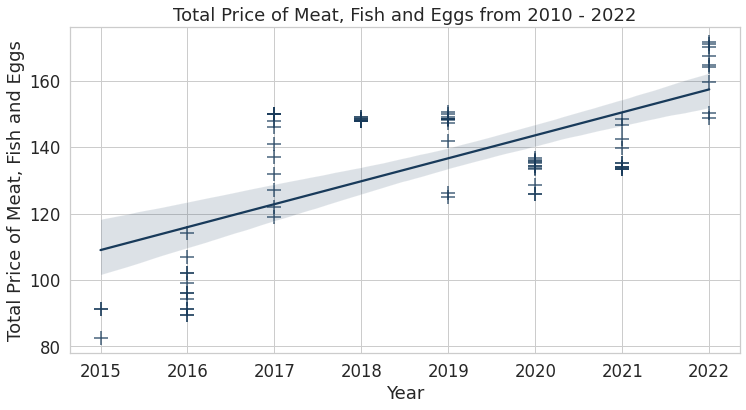

In [ ]:
plt.figure(figsize=(12, 6))

sns.set(font_scale=1.5)
sns.set_style('whitegrid') #white with grid

ax =sns.regplot(x="year", y="price",data=meat_data_mon, color=colors[0], marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Price of Meat, Fish and Eggs')
ax.set_title('Total Price of Meat, Fish and Eggs from 2010 - 2022')
plt.show()

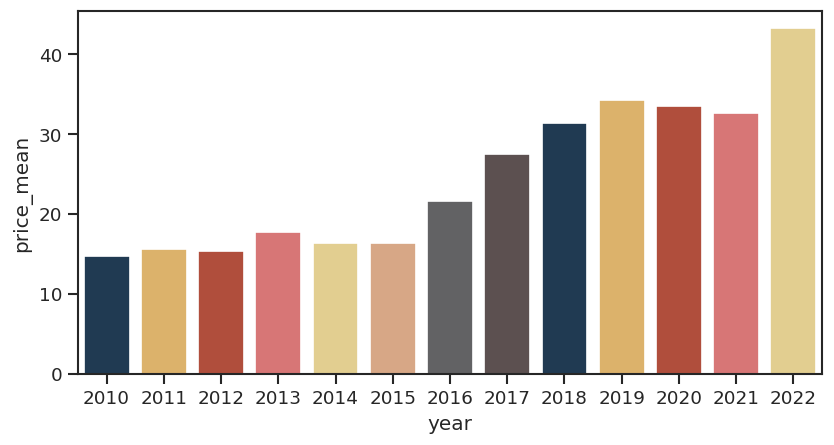

In [ ]:
plt.figure(figsize=(8,4),dpi=120)
sns.set(font_scale=1)
sns.set_style("ticks")
sns.barplot(x="year", y=df_years[df_years['food_category']=="cereals and tubers"]['price_mean'],data=df_years,palette=colors)

[Text(0, 0.5, '')]

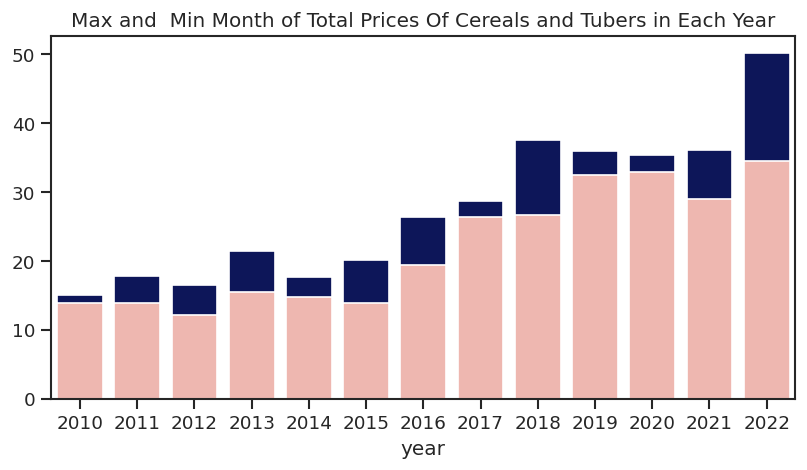

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4),dpi=120)
sns.set(font_scale=1)
sns.set_style("ticks")
sns.barplot(x=df_years['year'],y=cereals_data['price_max'],color='#000C66').set(ylabel=None,title='Max and  Min Month of Total Prices Of Cereals and Tubers in Each Year')
#axes[0].set_title('Distrbution Of Amount feature in Churn records')
sns.barplot(x=df_years['year'],y=cereals_data['price_min'],color='#F8AFA6').set(ylabel=None)

In [ ]:
cereals_data

,year,food_category,price_mean,price_min,price_max,price_change
0,2010,cereals and tubers,14.650000,13.93,15.03,NaN
6,2011,cereals and tubers,15.575833,13.80,17.80,0.063197
12,2012,cereals and tubers,15.354167,12.10,16.50,-0.014231
18,2013,cereals and tubers,17.645000,15.41,21.37,0.149199
24,2014,cereals and tubers,16.363333,14.70,17.62,-0.072636
30,2015,cereals and tubers,16.353636,13.90,20.13,-0.000593
37,2016,cereals and tubers,21.571667,19.38,26.32,0.319075
44,2017,cereals and tubers,27.440833,26.32,28.67,0.272078
51,2018,cereals and tubers,31.382500,26.57,37.56,0.143642
58,2019,cereals and tubers,34.229167,32.43,35.94,0.090709


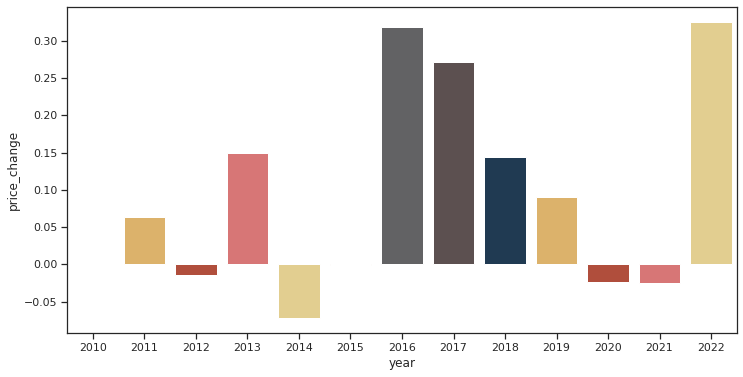

In [ ]:
plt.figure(figsize=(12,6))
plot = sns.barplot(x="year", y=cereals_data['price_change'],data=cereals_data,palette=colors)

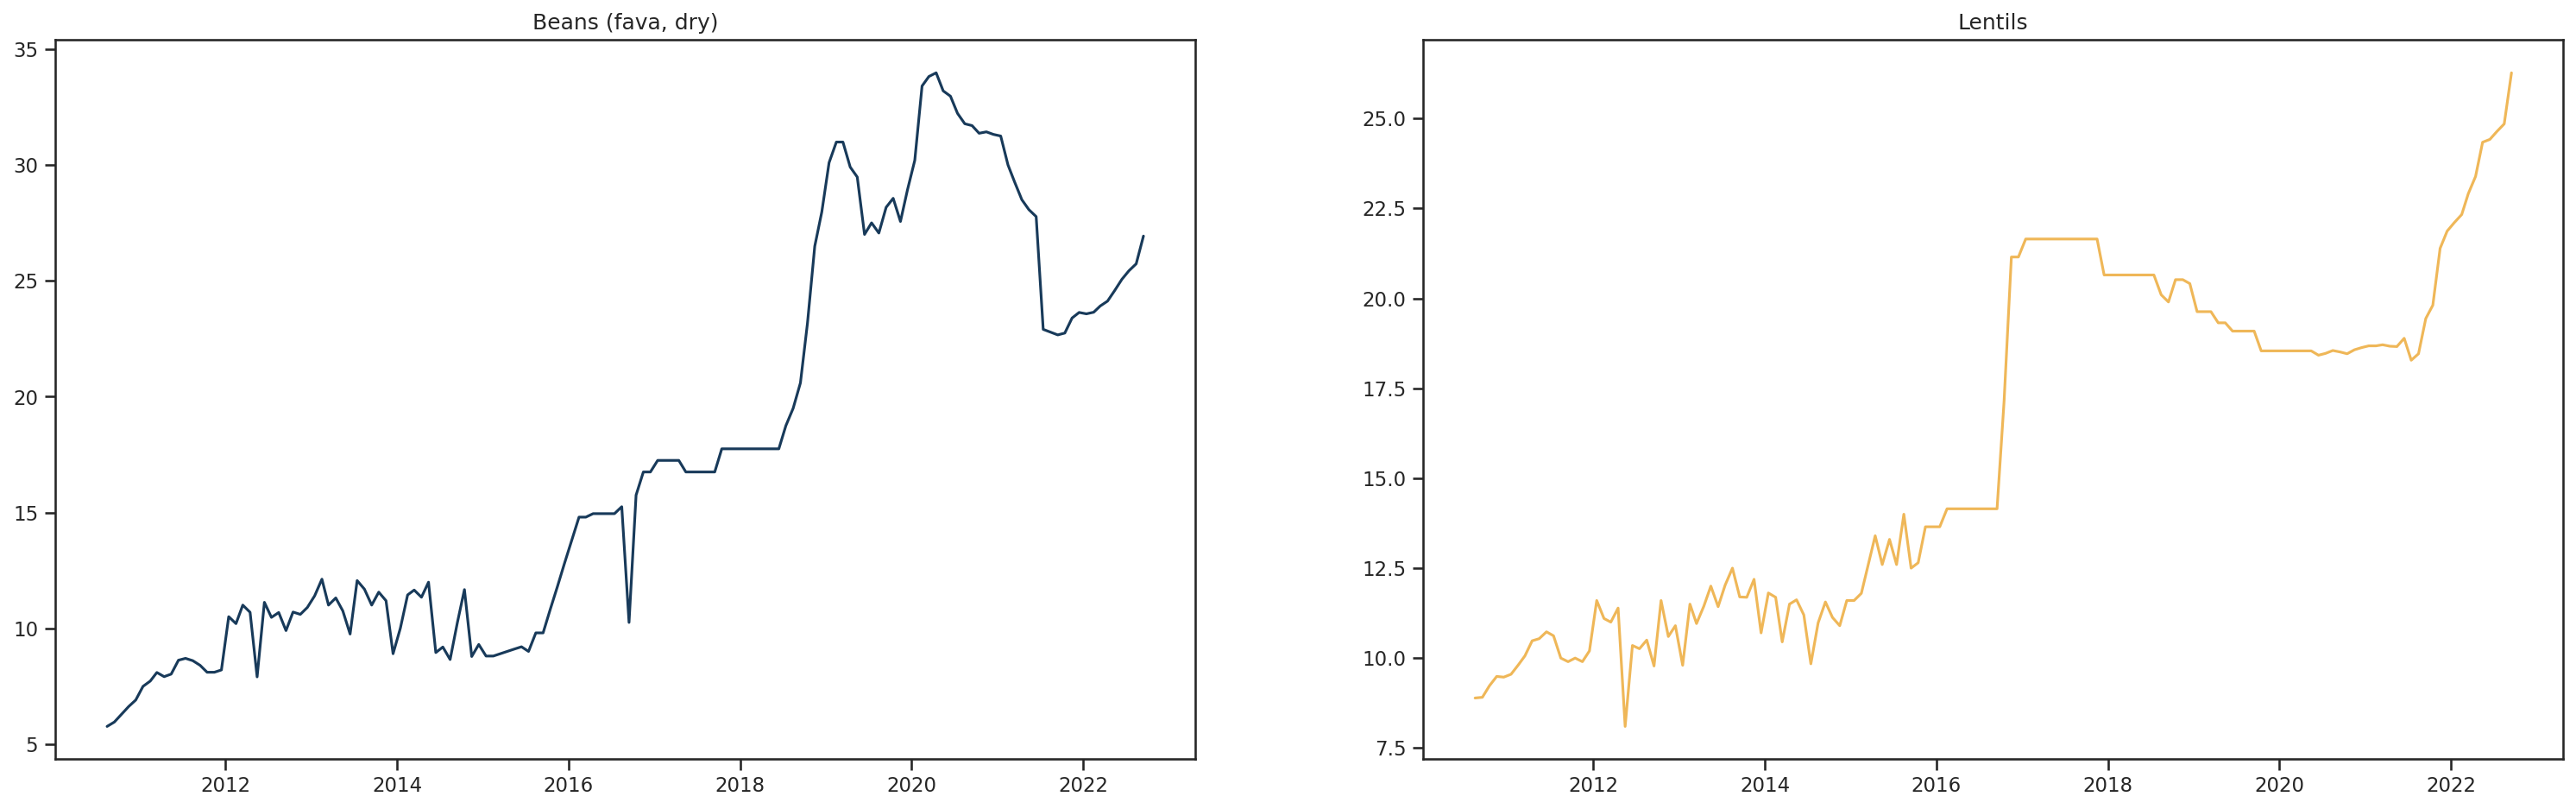

In [ ]:
Pulses_and_Nuts=["Beans (fava, dry)","Lentils" ]
plt.figure(figsize=(25,25),dpi=150)
for n, col in enumerate(Pulses_and_Nuts):
   ax = plt.subplot(3, 2,n+1)
   ax = sns.lineplot(data = df, x='date',y=df[df['food_name']==col]['price'],color=colors[n])
   ax.set_title(str(col))
   ax.set_ylabel('')
   ax.set_xlabel('')

In [ ]:
df[df['food_category']=='oil and fats']['food_name'].value_counts()

Ghee (natural)       145
Oil (maize)          142
Oil (sunflower)       87
Oil (mixed)           84
Ghee (artificial)     60
Name: food_name, dtype: int64

In [ ]:
df[df['food_category']=='pulses and nuts']['food_name'].value_counts()

Beans (fava, dry)    145
Lentils              145
Name: food_name, dtype: int64

# 🛒**Total Purchases**

**Months from 2010 to 2022 Total sum of Purchases**

In [ ]:
df_months_total_purchases = new_df.groupby(['date']).sum('price')
df_months_total_purchases = df_months_total_purchases.reset_index()
del df_months_total_purchases['year']
df_months_total_purchases.head(20)

,date,price,usdprice
0,2010-08-15,169.10,7.3126
1,2010-09-15,176.52,7.6328
2,2010-10-15,183.87,7.9512
3,2010-11-15,183.49,7.9358
4,2010-12-15,180.84,7.8194
5,2011-01-15,183.78,7.9484
6,2011-02-15,181.50,7.8483
7,2011-03-15,176.71,7.6412
8,2011-04-15,177.15,7.6606
9,2011-05-15,178.66,7.7252


**Years from 2010 to 2022 Total sum of Purchases**

In [ ]:
df_years_total_purchases = df_years.groupby(['year']).sum('price_mean')
df_years_total_purchases = df_years_total_purchases.reset_index()
print(df_years_total_purchases)

    year  price_mean  price_min  price_max
0   2010  178.764000     169.10     188.91
1   2011  185.117500     167.23     203.97
2   2012  191.835000     167.21     213.17
3   2013  211.769167     192.00     235.35
4   2014  216.468333     196.63     235.12
5   2015  276.115455     237.01     341.34
6   2016  346.182500     307.70     420.74
7   2017  486.707500     444.01     511.68
8   2018  498.897500     479.13     529.46
9   2019  507.741667     471.82     538.74
10  2020  515.866667     498.99     536.24
11  2021  532.298333     503.19     564.36
12  2022  608.662222     545.12     664.05
